In [1]:
# 라이브러리

import zipfile
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import f_oneway






In [ ]:
# 데이터 가져오기

In [3]:
import pandas as pd

# 같은 폴더에 있는 train.csv 불러오기
df = pd.read_csv("train.csv")

# 데이터 확인
print(df.shape)   # 행, 열 크기

(30858, 10)


In [5]:
df.head()

,ID,age,gender,tenure,frequent,payment_interval,subscription_type,contract_length,after_interaction,support_needs
0,TRAIN_00000,54.0,F,47.0,22.0,8.0,member,90,25.0,0
1,TRAIN_00001,30.0,M,16.0,15.0,5.0,vip,360,23.0,0
2,TRAIN_00002,29.0,M,8.0,30.0,21.0,plus,30,21.0,0
3,TRAIN_00003,38.0,F,38.0,23.0,10.0,vip,90,6.0,0
4,TRAIN_00004,25.0,F,52.0,3.0,17.0,member,30,1.0,2


In [ ]:
## ID                  : 각 고객(혹은 사용 사례)을 구분하는 고유 식별자 (모델 학습에는 보통 제외)
## age                 : 고객의 나이
## gender              : 고객의 성별 (male, female 등)
## tenure              : 고객이 서비스를 이용한 기간 (예: 개월 수, 일 수)
## frequent            : 서비스 사용 빈도 (주당/월당 이용 횟수 등)
## payment_interval    : 결제 주기 (예: monthly, quarterly, annually)
## subscription_type   : 구독 유형 (예: basic, standard, premium)
## contract_length     : 계약 기간 (예: 1개월, 6개월, 12개월)
## after_interaction   : 고객센터/지원 이후 고객의 행동 결과 (예: 긍정, 이탈, 업그레이드 등)
## support_needs       : 고객이 필요로 하는 지원 수준 (예: high, medium, low)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30858 entries, 0 to 30857
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 30858 non-null  object 
 1   age                30858 non-null  float64
 2   gender             30858 non-null  object 
 3   tenure             30858 non-null  float64
 4   frequent           30858 non-null  float64
 5   payment_interval   30858 non-null  float64
 6   subscription_type  30858 non-null  object 
 7   contract_length    30858 non-null  int64  
 8   after_interaction  30858 non-null  float64
 9   support_needs      30858 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 2.4+ MB


In [7]:
df.describe()

,age,tenure,frequent,payment_interval,contract_length,after_interaction,support_needs
count,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000
mean,39.428479,31.250275,15.803876,12.947145,186.643010,14.546147,0.804492
std,12.423977,17.403133,8.612354,8.302702,143.948206,8.599893,0.832419
min,18.000000,1.000000,1.000000,0.000000,30.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,6.000000,90.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,12.000000,90.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,19.000000,360.000000,22.000000,2.000000
max,65.000000,60.000000,30.000000,30.000000,360.000000,30.000000,2.000000


In [8]:
# 결측치 확인
na_cnt = df.isna().sum().sort_values(ascending=False)
na_pct = (df.isna().mean()*100).round(2).sort_values(ascending=False)
missing_summary = pd.DataFrame({"na_count": na_cnt, "na_pct": na_pct})
print(missing_summary.head(20))

                   na_count  na_pct
ID                        0     0.0
age                       0     0.0
gender                    0     0.0
tenure                    0     0.0
frequent                  0     0.0
payment_interval          0     0.0
subscription_type         0     0.0
contract_length           0     0.0
after_interaction         0     0.0
support_needs             0     0.0


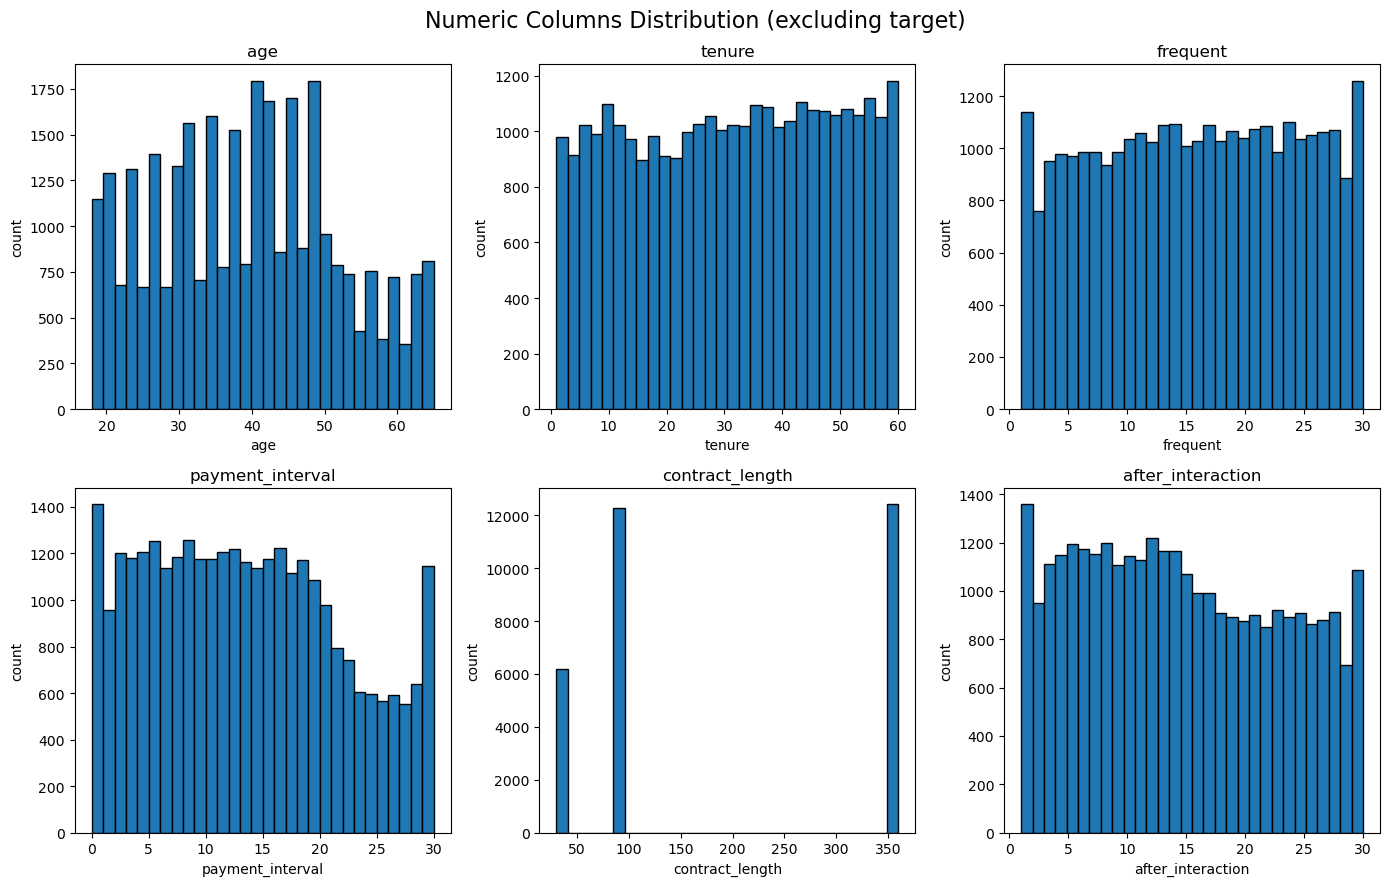

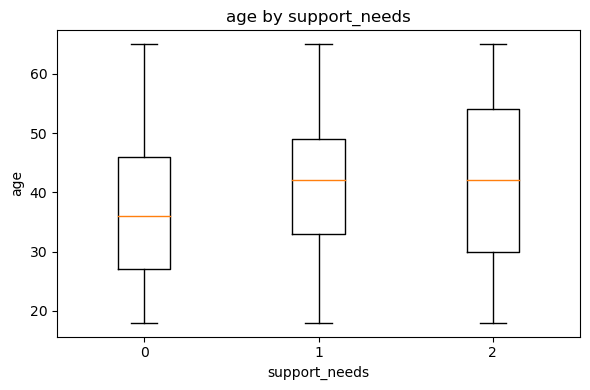

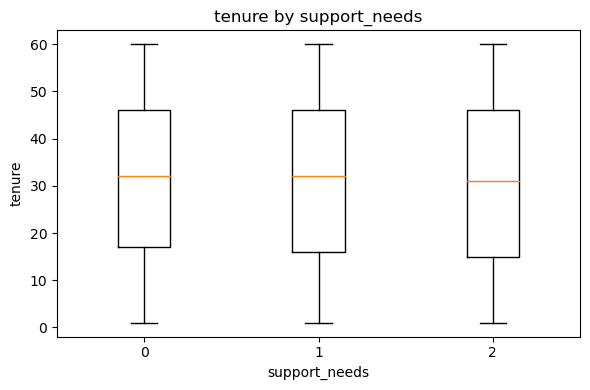

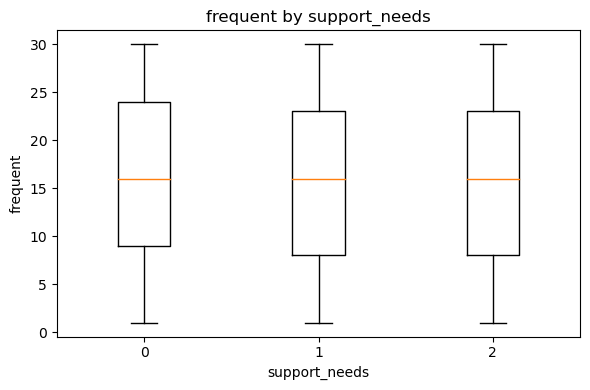

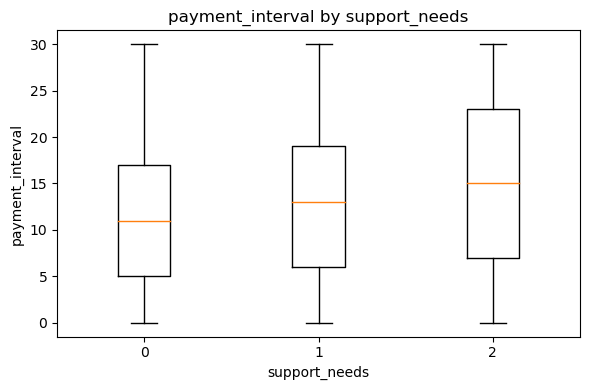

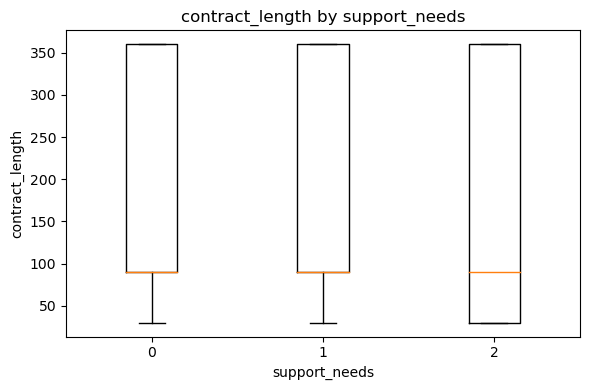

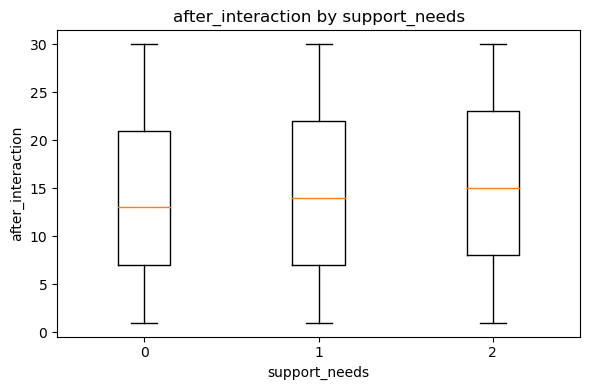

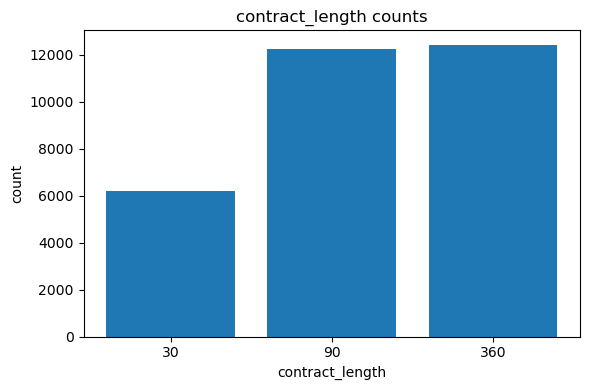

In [15]:
# 수치형

import matplotlib.pyplot as plt
import numpy as np

# 1) 수치형 히스토그램 (타깃 제외)
num_cols = ["age", "tenure", "frequent", "payment_interval", 
            "contract_length", "after_interaction"]  # support_needs 제외!

n = len(num_cols)
rows = 2
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(14, 9))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes[i]
    ax.hist(df[col].dropna(), bins=30, edgecolor="black")
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("count")

# 남는 서브플롯 비우기
for j in range(i+1, rows*cols):
    fig.delaxes(axes[j])

plt.suptitle("Numeric Columns Distribution (excluding target)", fontsize=16)
plt.tight_layout()
plt.show()


# 2) 변수별 박스플롯 (support_needs 그룹별)
target = "support_needs"
classes = sorted(df[target].unique())  # 보통 [0,1,2]

for col in num_cols:
    plt.figure(figsize=(6,4))
    # matplotlib 순정 박스플롯(그룹별로 리스트 만들어서)
    data_by_class = [df.loc[df[target] == c, col].dropna().values for c in classes]
    plt.boxplot(data_by_class, labels=[str(c) for c in classes], showfliers=True)
    plt.title(f"{col} by {target}")
    plt.xlabel(target)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# (옵션) contract_length가 30/90/360에 몰려있으면 카운트도 추가로 확인
plt.figure(figsize=(6,4))
counts = df["contract_length"].value_counts().sort_index()
plt.bar(counts.index.astype(str), counts.values)
plt.title("contract_length counts")
plt.xlabel("contract_length")
plt.ylabel("count")
plt.tight_layout()
plt.show()


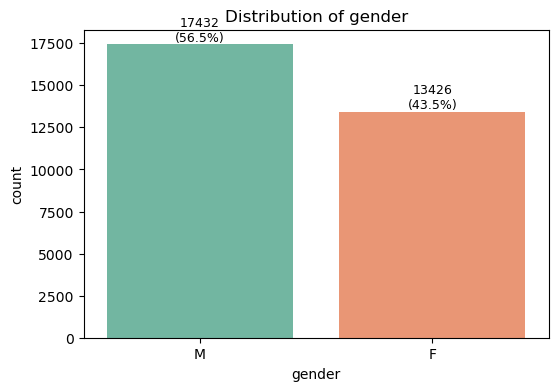

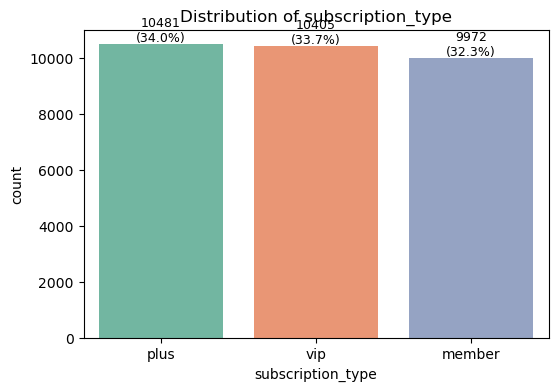

In [11]:
# 범주형

import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ["gender", "subscription_type"]

for c in cat_cols:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(x=c, data=df, order=df[c].value_counts().index, palette="Set2")
    plt.title(f"Distribution of {c}")
    plt.xlabel(c)
    plt.ylabel("count")
    
    # 비율 표시
    total = len(df)
    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(f"{count}\n({count/total:.1%})", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=9)
    plt.show()


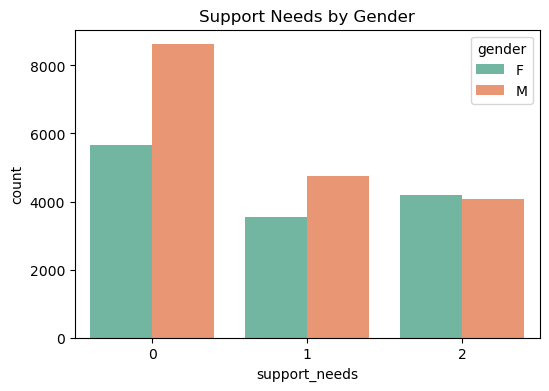

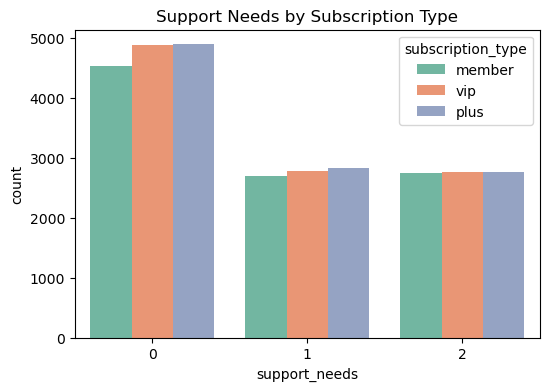

In [12]:
# 상관관계

import seaborn as sns
import matplotlib.pyplot as plt

# gender vs support_needs
plt.figure(figsize=(6,4))
sns.countplot(x="support_needs", hue="gender", data=df, palette="Set2")
plt.title("Support Needs by Gender")
plt.show()

# subscription_type vs support_needs
plt.figure(figsize=(6,4))
sns.countplot(x="support_needs", hue="subscription_type", data=df, palette="Set2")
plt.title("Support Needs by Subscription Type")
plt.show()


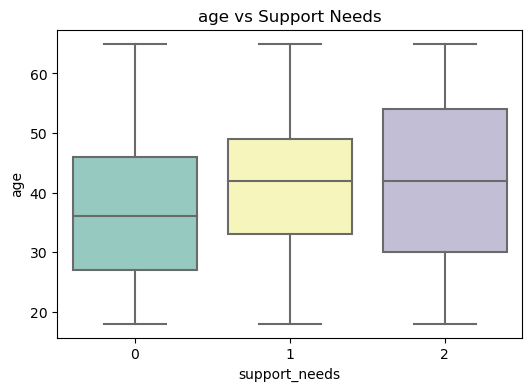

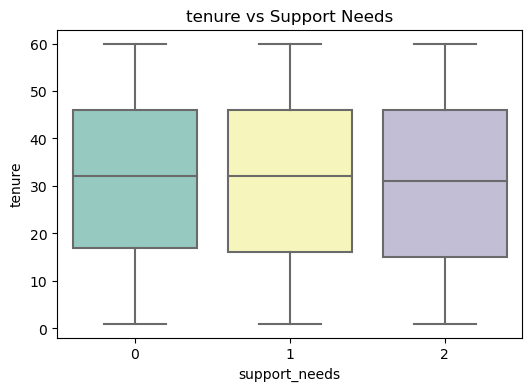

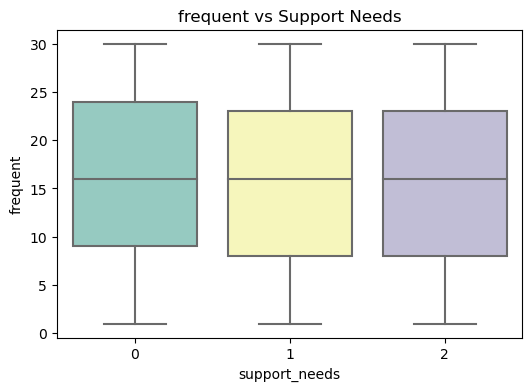

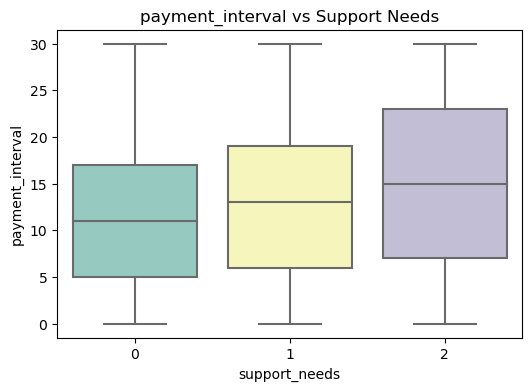

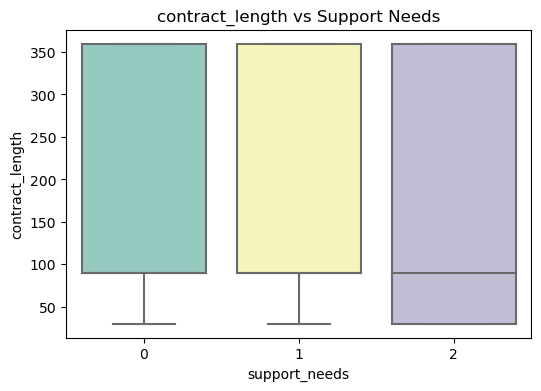

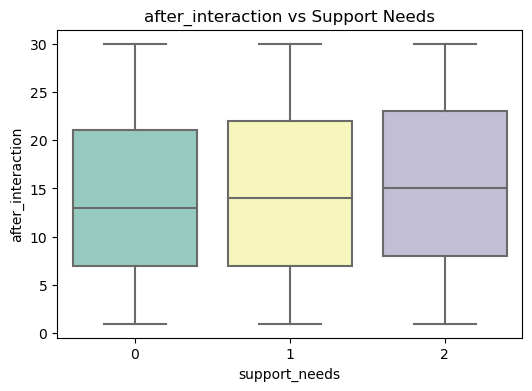

In [13]:
num_cols = ["age", "tenure", "frequent", "payment_interval", 
            "contract_length", "after_interaction"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="support_needs", y=col, data=df, palette="Set3")
    plt.title(f"{col} vs Support Needs")
    plt.show()


# 학습 및 예측

### 1. 

Model: MLP (3 hidden layers, 128 units, ReLU + BatchNorm)

Optimizer: Adam (lr=5e-4)

Batch Size: 128

Epochs: 30

EarlyStop: True (patience=5)

Features: same as previous

Categorical: gender, subscription_type (Embedding)

Notes: Added BatchNorm + Embedding

In [16]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# =====================
# 1. 데이터 로드
# =====================
df = pd.read_csv("train.csv")

# 타깃
y = df["support_needs"].values

# 범주형 & 수치형 분리
cat_cols = ["gender", "subscription_type"]
num_cols = ["age", "tenure", "frequent", "payment_interval", "contract_length", "after_interaction"]

# 범주형 -> Label Encoding (간단히, 임베딩에 쓰기 위함)
encoders = {}
for c in cat_cols:
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c])
    encoders[c] = le

# 수치형 -> scaling
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# 입력 데이터
X = df[cat_cols + num_cols].values

# train/valid split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# =====================
# 2. Dataset / DataLoader
# =====================
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)  # 분류이므로 long
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = MyDataset(X_train, y_train)
val_ds = MyDataset(X_val, y_val)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=64)


# =====================
# 3. 모델 정의 (간단 MLP)
# =====================
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_classes=3):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_classes)
        )
    def forward(self, x):
        return self.net(x)

model = MLP(input_dim=X.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


# =====================
# 4. 학습 루프
# =====================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(10):
    model.train()
    train_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * len(xb)
    train_loss /= len(train_ds)

    # validation
    model.eval()
    val_loss, correct = 0, 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            loss = criterion(preds, yb)
            val_loss += loss.item() * len(xb)
            correct += (preds.argmax(1) == yb).sum().item()
    val_loss /= len(val_ds)
    acc = correct / len(val_ds)
    print(f"Epoch {epoch+1:02d} | TrainLoss {train_loss:.4f} | ValLoss {val_loss:.4f} | ValAcc {acc:.4f}")



Epoch 01 | TrainLoss 1.0258 | ValLoss 1.0152 | ValAcc 0.4935
Epoch 02 | TrainLoss 1.0103 | ValLoss 1.0110 | ValAcc 0.5023
Epoch 03 | TrainLoss 1.0039 | ValLoss 1.0061 | ValAcc 0.5031
Epoch 04 | TrainLoss 0.9996 | ValLoss 1.0056 | ValAcc 0.5044
Epoch 05 | TrainLoss 0.9945 | ValLoss 0.9991 | ValAcc 0.5076
Epoch 06 | TrainLoss 0.9892 | ValLoss 0.9982 | ValAcc 0.5099
Epoch 07 | TrainLoss 0.9841 | ValLoss 0.9912 | ValAcc 0.5073
Epoch 08 | TrainLoss 0.9791 | ValLoss 0.9906 | ValAcc 0.5133
Epoch 09 | TrainLoss 0.9769 | ValLoss 0.9900 | ValAcc 0.5173
Epoch 10 | TrainLoss 0.9735 | ValLoss 0.9880 | ValAcc 0.5185


### 2. 

Model: MLP (2 hidden layers × 128 units, ReLU + BatchNorm)

Optimizer: Adam (lr=5e-4, weight_decay=1e-5)

Batch Size: 128 (val 256)

Epochs: 30

EarlyStop: False

Features: scaled numeric (age, tenure, frequent, payment_interval, 

contract_length, after_interaction) + one-hot categorical

Categorical: gender, subscription_type (One-Hot)

Notes: Fixed data leakage; added BatchNorm + Dropout; widened network

In [19]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) 데이터 로드
df = pd.read_csv("train.csv")
target_col = "support_needs"

# 2) split 먼저!
train_df, val_df = train_test_split(
    df, test_size=0.2, stratify=df[target_col], random_state=42
)

# 3) 전처리
num_cols = ["age", "tenure", "frequent", "payment_interval", "contract_length", "after_interaction"]
cat_cols = ["gender", "subscription_type"]

# 3-1) 수치형: train에 fit, val엔 transform만
scaler = StandardScaler()
train_num = scaler.fit_transform(train_df[num_cols])
val_num   = scaler.transform(val_df[num_cols])

# 3-2) 범주형: 원-핫 인코딩 (train 기준 컬럼 맞춤)
train_cat = pd.get_dummies(train_df[cat_cols], drop_first=False)
val_cat   = pd.get_dummies(val_df[cat_cols], drop_first=False)

# 열 맞추기(혹시 val에 없는 범주가 있을 수 있으므로)
val_cat = val_cat.reindex(columns=train_cat.columns, fill_value=0)

# 3-3) 합치기
import numpy as np
X_train = np.hstack([train_num, train_cat.values])
X_val   = np.hstack([val_num,   val_cat.values])

y_train = train_df[target_col].values
y_val   = val_df[target_col].values

# 4) Dataset/DataLoader
class DS(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

train_loader = DataLoader(DS(X_train, y_train), batch_size=128, shuffle=True)
val_loader   = DataLoader(DS(X_val,   y_val),   batch_size=256, shuffle=False)

# 5) 모델 (조금 키우고 BatchNorm 추가)
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_train))

class MLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes),
        )
    def forward(self, x): return self.net(x)

model = MLP(input_dim, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 6) 학습 (epoch 늘림)
epochs = 30
best_val = float("inf")
for epoch in range(1, epochs+1):
    model.train()
    total = 0; correct = 0; train_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * len(xb)
        total += len(xb)
        correct += (out.argmax(1) == yb).sum().item()
    train_loss /= total
    train_acc = correct / total

    model.eval()
    val_loss = 0.0; vtotal = 0; vcorrect = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            loss = criterion(out, yb)
            val_loss += loss.item() * len(xb)
            vtotal += len(xb)
            vcorrect += (out.argmax(1) == yb).sum().item()
    val_loss /= vtotal
    val_acc = vcorrect / vtotal

    print(f"Epoch {epoch:02d} | TrainLoss {train_loss:.4f} | TrainAcc {train_acc:.4f} | "
          f"ValLoss {val_loss:.4f} | ValAcc {val_acc:.4f}")


Epoch 01 | TrainLoss 1.0373 | TrainAcc 0.4752 | ValLoss 1.0109 | ValAcc 0.4989
Epoch 02 | TrainLoss 1.0183 | TrainAcc 0.4926 | ValLoss 1.0094 | ValAcc 0.4947
Epoch 03 | TrainLoss 1.0093 | TrainAcc 0.4987 | ValLoss 1.0087 | ValAcc 0.4984
Epoch 04 | TrainLoss 1.0053 | TrainAcc 0.5045 | ValLoss 1.0061 | ValAcc 0.5003
Epoch 05 | TrainLoss 1.0017 | TrainAcc 0.5064 | ValLoss 1.0053 | ValAcc 0.4985
Epoch 06 | TrainLoss 0.9982 | TrainAcc 0.5080 | ValLoss 1.0048 | ValAcc 0.4976
Epoch 07 | TrainLoss 0.9967 | TrainAcc 0.5081 | ValLoss 1.0020 | ValAcc 0.5015
Epoch 08 | TrainLoss 0.9957 | TrainAcc 0.5094 | ValLoss 1.0022 | ValAcc 0.4977
Epoch 09 | TrainLoss 0.9937 | TrainAcc 0.5117 | ValLoss 1.0005 | ValAcc 0.5063
Epoch 10 | TrainLoss 0.9918 | TrainAcc 0.5135 | ValLoss 1.0014 | ValAcc 0.5045
Epoch 11 | TrainLoss 0.9913 | TrainAcc 0.5122 | ValLoss 0.9994 | ValAcc 0.5083
Epoch 12 | TrainLoss 0.9881 | TrainAcc 0.5168 | ValLoss 0.9979 | ValAcc 0.5058
Epoch 13 | TrainLoss 0.9878 | TrainAcc 0.5179 | ValL

### 3. 

Model: MLP (3 hidden layers, 256 units, ReLU + BatchNorm)

Optimizer: Adam (lr=5e-4, weight_decay=1e-5)

Batch Size: 256 (val 512)

Epochs: 120

EarlyStop: True (patience=10)

Features: scaled numeric + one-hot categorical

Categorical: gender, subscription_type (One-Hot)

Notes: Longer training + EarlyStopping; larger network (256×3); 

leakage-safe split

In [20]:
# ==== Longer training + EarlyStopping, wider MLP ====
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# 1) Load
df = pd.read_csv("train.csv")
target_col = "support_needs"

# 2) Split first (no leakage)
train_df, val_df = train_test_split(
    df, test_size=0.2, stratify=df[target_col], random_state=42
)

# 3) Preprocess
num_cols = ["age","tenure","frequent","payment_interval","contract_length","after_interaction"]
cat_cols = ["gender","subscription_type"]

scaler = StandardScaler()
Xnum_tr = scaler.fit_transform(train_df[num_cols])
Xnum_va = scaler.transform(val_df[num_cols])

Xcat_tr = pd.get_dummies(train_df[cat_cols], drop_first=False)
Xcat_va = pd.get_dummies(val_df[cat_cols], drop_first=False)
Xcat_va = Xcat_va.reindex(columns=Xcat_tr.columns, fill_value=0)

X_train = np.hstack([Xnum_tr, Xcat_tr.values])
X_val   = np.hstack([Xnum_va, Xcat_va.values])
y_train = train_df[target_col].values
y_val   = val_df[target_col].values

class DS(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

train_loader = DataLoader(DS(X_train, y_train), batch_size=256, shuffle=True, drop_last=False)
val_loader   = DataLoader(DS(X_val,   y_val),   batch_size=512, shuffle=False, drop_last=False)

# 4) Model (wider + BN)
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_train))

class MLP(nn.Module):
    def __init__(self, input_dim, num_classes, hidden=256, layers=3, pdrop=0.2):
        super().__init__()
        dims = [input_dim] + [hidden]*layers
        blocks = []
        for i in range(len(dims)-1):
            blocks += [
                nn.Linear(dims[i], dims[i+1]),
                nn.BatchNorm1d(dims[i+1]),
                nn.ReLU(),
                nn.Dropout(pdrop),
            ]
        self.backbone = nn.Sequential(*blocks)
        self.head = nn.Linear(hidden, num_classes)
    def forward(self, x):
        return self.head(self.backbone(x))

model = MLP(input_dim, num_classes, hidden=256, layers=3, pdrop=0.2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 5) EarlyStopping utility
class EarlyStopping:
    def __init__(self, patience=10, mode="min", min_delta=0.0):
        self.patience = patience
        self.mode = mode
        self.min_delta = min_delta
        self.best = None
        self.count = 0
        self.stop = False
    def __call__(self, current):
        if self.best is None:
            self.best = current
            return
        improve = (current < self.best - self.min_delta) if self.mode=="min" else (current > self.best + self.min_delta)
        if improve:
            self.best = current
            self.count = 0
        else:
            self.count += 1
            if self.count >= self.patience:
                self.stop = True

early_stop = EarlyStopping(patience=10, mode="min", min_delta=0.0)

# 6) Train (up to 120 epochs)
epochs = 120
best_state = None
best_val_loss = float("inf")

for epoch in range(1, epochs+1):
    model.train()
    train_loss, correct, total = 0.0, 0, 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * len(xb)
        correct += (out.argmax(1) == yb).sum().item()
        total += len(xb)
    train_loss /= total
    train_acc = correct / total

    model.eval()
    val_loss, vtotal, vcorrect = 0.0, 0, 0
    all_preds, all_true = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            loss = criterion(out, yb)
            val_loss += loss.item() * len(xb)
            vtotal += len(xb)
            preds = out.argmax(1)
            vcorrect += (preds == yb).sum().item()
            all_preds.append(preds.cpu().numpy()); all_true.append(yb.cpu().numpy())
    val_loss /= vtotal
    val_acc = vcorrect / vtotal
    y_true = np.concatenate(all_true); y_pred = np.concatenate(all_preds)
    macro_f1 = f1_score(y_true, y_pred, average="macro")

    print(f"Epoch {epoch:03d} | TrainLoss {train_loss:.4f} | TrainAcc {train_acc:.4f} | "
          f"ValLoss {val_loss:.4f} | ValAcc {val_acc:.4f} | MacroF1 {macro_f1:.4f}")

    # Early stopping on ValLoss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_state = {k:v.cpu().clone() for k,v in model.state_dict().items()}
    early_stop(val_loss)
    if early_stop.stop:
        print(f"> Early stopped at epoch {epoch}. Best ValLoss: {best_val_loss:.4f}")
        break

# (선택) best snapshot 복원
if best_state is not None:
    model.load_state_dict(best_state)


Epoch 001 | TrainLoss 1.0361 | TrainAcc 0.4819 | ValLoss 1.0153 | ValAcc 0.4968 | MacroF1 0.3762
Epoch 002 | TrainLoss 1.0095 | TrainAcc 0.4979 | ValLoss 1.0029 | ValAcc 0.5015 | MacroF1 0.3827
Epoch 003 | TrainLoss 0.9975 | TrainAcc 0.5079 | ValLoss 1.0057 | ValAcc 0.5031 | MacroF1 0.4012
Epoch 004 | TrainLoss 0.9964 | TrainAcc 0.5050 | ValLoss 0.9997 | ValAcc 0.5008 | MacroF1 0.4110
Epoch 005 | TrainLoss 0.9898 | TrainAcc 0.5112 | ValLoss 0.9963 | ValAcc 0.5036 | MacroF1 0.4207
Epoch 006 | TrainLoss 0.9842 | TrainAcc 0.5145 | ValLoss 0.9945 | ValAcc 0.5075 | MacroF1 0.3994
Epoch 007 | TrainLoss 0.9814 | TrainAcc 0.5206 | ValLoss 0.9952 | ValAcc 0.5036 | MacroF1 0.3779
Epoch 008 | TrainLoss 0.9782 | TrainAcc 0.5252 | ValLoss 0.9931 | ValAcc 0.5157 | MacroF1 0.4106
Epoch 009 | TrainLoss 0.9791 | TrainAcc 0.5209 | ValLoss 0.9913 | ValAcc 0.5160 | MacroF1 0.3961
Epoch 010 | TrainLoss 0.9766 | TrainAcc 0.5233 | ValLoss 0.9902 | ValAcc 0.5152 | MacroF1 0.4012
Epoch 011 | TrainLoss 0.9739 |

### 4. 

Model: MLP (4 hidden layers, 512 units, ReLU + BatchNorm)

Optimizer: AdamW (lr=3e-4, weight_decay=1e-4)

Batch Size: 512 (val 1024)

Epochs: 150

EarlyStop: True (patience=15)

Features: scaled numeric + one-hot categorical

Categorical: gender, subscription_type (One-Hot)

Notes: Larger network (512×4); class weights + label smoothing; ReduceLROnPlateau on ValLoss; leakage-safe split


In [21]:
# ==== Customer Support Needs Classification: Wide MLP + Scheduler + Class Weights ====
import os
import random
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# -----------------
# 0) Reproducibility (optional)
# -----------------
def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
set_seed(42)

# -----------------
# 1) Load
# -----------------
df = pd.read_csv("train.csv")
target_col = "support_needs"

# -----------------
# 2) Split FIRST (avoid leakage)
# -----------------
train_df, val_df = train_test_split(
    df, test_size=0.2, stratify=df[target_col], random_state=42
)

# -----------------
# 3) Preprocess
# -----------------
num_cols = ["age","tenure","frequent","payment_interval","contract_length","after_interaction"]
cat_cols = ["gender","subscription_type"]

# 3-1) numeric scaling (fit on train only)
scaler = StandardScaler()
Xnum_tr = scaler.fit_transform(train_df[num_cols])
Xnum_va = scaler.transform(val_df[num_cols])

# 3-2) one-hot (align columns)
Xcat_tr = pd.get_dummies(train_df[cat_cols], drop_first=False)
Xcat_va = pd.get_dummies(val_df[cat_cols], drop_first=False)
Xcat_va = Xcat_va.reindex(columns=Xcat_tr.columns, fill_value=0)

# 3-3) concat
X_train = np.hstack([Xnum_tr, Xcat_tr.values])
X_val   = np.hstack([Xnum_va,  Xcat_va.values])
y_train = train_df[target_col].values
y_val   = val_df[target_col].values

# -----------------
# 4) Dataset / DataLoader
# -----------------
class CSNDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

train_loader = DataLoader(CSNDataset(X_train, y_train), batch_size=512, shuffle=True)
val_loader   = DataLoader(CSNDataset(X_val,   y_val),   batch_size=1024, shuffle=False)

# -----------------
# 5) Model
# -----------------
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_train))

class WideMLP(nn.Module):
    def __init__(self, input_dim, num_classes, hidden=512, layers=4, pdrop=0.2):
        super().__init__()
        dims = [input_dim] + [hidden]*layers
        blocks = []
        for i in range(len(dims)-1):
            blocks += [
                nn.Linear(dims[i], dims[i+1]),
                nn.BatchNorm1d(dims[i+1]),
                nn.ReLU(),
                nn.Dropout(pdrop),
            ]
        self.backbone = nn.Sequential(*blocks)
        self.head = nn.Linear(hidden, num_classes)
    def forward(self, x):
        return self.head(self.backbone(x))

model = WideMLP(input_dim, num_classes, hidden=512, layers=4, pdrop=0.2)

# -----------------
# 6) Loss (class weights + label smoothing), Optimizer, Scheduler
# -----------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# class weights from train distribution (inverse frequency)
classes, counts = np.unique(y_train, return_counts=True)
total = counts.sum()
class_weights = total / (len(classes) * counts)  # simple inverse frequency
class_weights = torch.tensor(class_weights, dtype=torch.float32, device=device)

criterion = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.05)
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)

# ReduceLROnPlateau on validation loss
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.5, patience=5, verbose=True, min_lr=1e-6
)

# -----------------
# 7) EarlyStopping
# -----------------
class EarlyStopping:
    def __init__(self, patience=15, mode="min", min_delta=0.0):
        self.patience = patience
        self.mode = mode
        self.min_delta = min_delta
        self.best = None
        self.count = 0
        self.stop = False
    def __call__(self, current):
        if self.best is None:
            self.best = current
            return
        improved = (current < self.best - self.min_delta) if self.mode == "min" else (current > self.best + self.min_delta)
        if improved:
            self.best = current
            self.count = 0
        else:
            self.count += 1
            if self.count >= self.patience:
                self.stop = True

early_stop = EarlyStopping(patience=15, mode="min", min_delta=0.0)

# -----------------
# 8) Train Loop
# -----------------
epochs = 150
best_val_loss = float("inf")
best_state = None

for epoch in range(1, epochs+1):
    # train
    model.train()
    train_loss, correct, total = 0.0, 0, 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * len(xb)
        pred = out.argmax(1)
        correct += (pred == yb).sum().item()
        total += len(xb)
    train_loss /= total
    train_acc = correct / total

    # validate
    model.eval()
    val_loss, vtotal, vcorrect = 0.0, 0, 0
    all_preds, all_true = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            loss = criterion(out, yb)
            val_loss += loss.item() * len(xb)
            preds = out.argmax(1)
            vcorrect += (preds == yb).sum().item()
            vtotal += len(xb)
            all_preds.append(preds.cpu().numpy())
            all_true.append(yb.cpu().numpy())
    val_loss /= vtotal
    val_acc = vcorrect / vtotal
    y_true = np.concatenate(all_true); y_pred = np.concatenate(all_preds)
    macro_f1 = f1_score(y_true, y_pred, average="macro")

    # log
    print(f"Epoch {epoch:03d} | TrainLoss {train_loss:.4f} | TrainAcc {train_acc:.4f} | "
          f"ValLoss {val_loss:.4f} | ValAcc {val_acc:.4f} | MacroF1 {macro_f1:.4f} | LR {optimizer.param_groups[0]['lr']:.2e}")

    # best snapshot
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

    # step scheduler & early stop
    scheduler.step(val_loss)
    early_stop(val_loss)
    if early_stop.stop:
        print(f"> Early stopped at epoch {epoch}. Best ValLoss: {best_val_loss:.4f}")
        break

# restore best
if best_state is not None:
    model.load_state_dict(best_state)


/Users/juneon/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 001 | TrainLoss 1.0895 | TrainAcc 0.4331 | ValLoss 1.0578 | ValAcc 0.4642 | MacroF1 0.4439 | LR 3.00e-04
Epoch 002 | TrainLoss 1.0621 | TrainAcc 0.4597 | ValLoss 1.0581 | ValAcc 0.4501 | MacroF1 0.4462 | LR 3.00e-04
Epoch 003 | TrainLoss 1.0476 | TrainAcc 0.4708 | ValLoss 1.0508 | ValAcc 0.4691 | MacroF1 0.4587 | LR 3.00e-04
Epoch 004 | TrainLoss 1.0448 | TrainAcc 0.4724 | ValLoss 1.0454 | ValAcc 0.4749 | MacroF1 0.4622 | LR 3.00e-04
Epoch 005 | TrainLoss 1.0377 | TrainAcc 0.4829 | ValLoss 1.0454 | ValAcc 0.4763 | MacroF1 0.4642 | LR 3.00e-04
Epoch 006 | TrainLoss 1.0333 | TrainAcc 0.4861 | ValLoss 1.0414 | ValAcc 0.4742 | MacroF1 0.4649 | LR 3.00e-04
Epoch 007 | TrainLoss 1.0306 | TrainAcc 0.4927 | ValLoss 1.0424 | ValAcc 0.4793 | MacroF1 0.4698 | LR 3.00e-04
Epoch 008 | TrainLoss 1.0259 | TrainAcc 0.4925 | ValLoss 1.0441 | ValAcc 0.4810 | MacroF1 0.4679 | LR 3.00e-04
Epoch 009 | TrainLoss 1.0261 | TrainAcc 0.4941 | ValLoss 1.0448 | ValAcc 0.4770 | MacroF1 0.4674 | LR 3.00e-04
E

### 5. 

Model: MLP (4 hidden layers, 512 units, ReLU + BatchNorm)

Optimizer: AdamW (lr=3e-4, weight_decay=1e-4)

Batch Size: 512 (val 1024)

Epochs: 150

EarlyStop: True (patience=15)

Features: scaled numeric + one-hot categorical

Categorical: gender, subscription_type (One-Hot)

Notes: FocalLoss(gamma=2.0, alpha=class weights) 적용; Larger network(512×4); ReduceLROnPlateau on ValLoss; leakage-safe split


In [22]:
# ==== Customer Support Needs Classification: Wide MLP + Focal Loss ====
import os, random, numpy as np, pandas as pd, torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# -----------------
# 0) Reproducibility (optional)
# -----------------
def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)
set_seed(42)

# -----------------
# 1) Load
# -----------------
df = pd.read_csv("train.csv")
target_col = "support_needs"

# -----------------
# 2) Split FIRST (avoid leakage)
# -----------------
train_df, val_df = train_test_split(
    df, test_size=0.2, stratify=df[target_col], random_state=42
)

# -----------------
# 3) Preprocess
# -----------------
num_cols = ["age","tenure","frequent","payment_interval","contract_length","after_interaction"]
cat_cols = ["gender","subscription_type"]

scaler = StandardScaler()
Xnum_tr = scaler.fit_transform(train_df[num_cols])
Xnum_va = scaler.transform(val_df[num_cols])

Xcat_tr = pd.get_dummies(train_df[cat_cols], drop_first=False)
Xcat_va = pd.get_dummies(val_df[cat_cols], drop_first=False)
Xcat_va = Xcat_va.reindex(columns=Xcat_tr.columns, fill_value=0)

X_train = np.hstack([Xnum_tr, Xcat_tr.values])
X_val   = np.hstack([Xnum_va,  Xcat_va.values])
y_train = train_df[target_col].values
y_val   = val_df[target_col].values

# -----------------
# 4) Dataset / DataLoader
# -----------------
class CSNDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.X)
    def __getitem__(self, i): return self.X[i], self.y[i]

train_loader = DataLoader(CSNDataset(X_train, y_train), batch_size=512, shuffle=True)
val_loader   = DataLoader(CSNDataset(X_val,   y_val),   batch_size=1024, shuffle=False)

# -----------------
# 5) Model
# -----------------
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_train))

class WideMLP(nn.Module):
    def __init__(self, input_dim, num_classes, hidden=512, layers=4, pdrop=0.2):
        super().__init__()
        dims = [input_dim] + [hidden]*layers
        blocks = []
        for i in range(len(dims)-1):
            blocks += [
                nn.Linear(dims[i], dims[i+1]),
                nn.BatchNorm1d(dims[i+1]),
                nn.ReLU(),
                nn.Dropout(pdrop),
            ]
        self.backbone = nn.Sequential(*blocks)
        self.head = nn.Linear(hidden, num_classes)
    def forward(self, x):
        return self.head(self.backbone(x))

model = WideMLP(input_dim, num_classes, hidden=512, layers=4, pdrop=0.2)

# -----------------
# 6) Focal Loss (multi-class) + AdamW
# -----------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# class weights from train distribution (inverse frequency) -> alpha in Focal
classes, counts = np.unique(y_train, return_counts=True)
total = counts.sum()
alpha = total / (len(classes) * counts)  # inverse frequency
alpha = torch.tensor(alpha, dtype=torch.float32, device=device)

class FocalLoss(nn.Module):
    """
    Multi-class focal loss with logits.
    - gamma: focusing parameter
    - alpha: class weights tensor (per-class), optional
    """
    def __init__(self, gamma=2.0, alpha=None, reduction="mean"):
        super().__init__()
        self.gamma = gamma
        self.alpha = alpha  # shape [C] or None
        self.reduction = reduction
    def forward(self, logits, target):
        # logits: [B, C], target: [B]
        log_probs = torch.log_softmax(logits, dim=1)               # [B, C]
        probs = torch.softmax(logits, dim=1)                       # [B, C]
        pt = probs[torch.arange(logits.size(0)), target]           # [B]
        log_pt = log_probs[torch.arange(logits.size(0)), target]   # [B]
        focal_factor = (1 - pt).pow(self.gamma)                    # [B]
        if self.alpha is not None:
            at = self.alpha[target]                                # [B]
            loss = -at * focal_factor * log_pt
        else:
            loss = -focal_factor * log_pt
        if self.reduction == "mean":
            return loss.mean()
        elif self.reduction == "sum":
            return loss.sum()
        return loss

criterion = FocalLoss(gamma=2.0, alpha=alpha, reduction="mean")
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)

# (선택) 스케줄러: ReduceLROnPlateau 대신 CosineAnnealingWarmRestarts도 가능
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.5, patience=5, verbose=True, min_lr=1e-6
)

# -----------------
# 7) EarlyStopping
# -----------------
class EarlyStopping:
    def __init__(self, patience=15, mode="min", min_delta=0.0):
        self.patience = patience
        self.mode = mode
        self.min_delta = min_delta
        self.best = None
        self.count = 0
        self.stop = False
    def __call__(self, current):
        if self.best is None:
            self.best = current; return
        improved = (current < self.best - self.min_delta) if self.mode=="min" else (current > self.best + self.min_delta)
        if improved:
            self.best = current; self.count = 0
        else:
            self.count += 1
            if self.count >= self.patience:
                self.stop = True

early_stop = EarlyStopping(patience=15, mode="min", min_delta=0.0)

# -----------------
# 8) Train Loop
# -----------------
epochs = 150
best_val_loss = float("inf")
best_state = None

for epoch in range(1, epochs+1):
    # train
    model.train()
    train_loss, correct, total = 0.0, 0, 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * len(xb)
        pred = out.argmax(1)
        correct += (pred == yb).sum().item()
        total += len(xb)
    train_loss /= total
    train_acc = correct / total

    # validate
    model.eval()
    val_loss, vtotal, vcorrect = 0.0, 0, 0
    all_preds, all_true = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            loss = criterion(out, yb)
            val_loss += loss.item() * len(xb)
            preds = out.argmax(1)
            vcorrect += (preds == yb).sum().item()
            vtotal += len(xb)
            all_preds.append(preds.cpu().numpy()); all_true.append(yb.cpu().numpy())
    val_loss /= vtotal
    val_acc = vcorrect / vtotal
    y_true = np.concatenate(all_true); y_pred = np.concatenate(all_preds)
    macro_f1 = f1_score(y_true, y_pred, average="macro")

    print(f"Epoch {epoch:03d} | TrainLoss {train_loss:.4f} | TrainAcc {train_acc:.4f} | "
          f"ValLoss {val_loss:.4f} | ValAcc {val_acc:.4f} | MacroF1 {macro_f1:.4f} | LR {optimizer.param_groups[0]['lr']:.2e}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

    scheduler.step(val_loss)
    early_stop(val_loss)
    if early_stop.stop:
        print(f"> Early stopped at epoch {epoch}. Best ValLoss: {best_val_loss:.4f}")
        break

# restore best
if best_state is not None:
    model.load_state_dict(best_state)


/Users/juneon/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 001 | TrainLoss 0.5095 | TrainAcc 0.4169 | ValLoss 0.4658 | ValAcc 0.4621 | MacroF1 0.4451 | LR 3.00e-04
Epoch 002 | TrainLoss 0.4796 | TrainAcc 0.4390 | ValLoss 0.4646 | ValAcc 0.4464 | MacroF1 0.4388 | LR 3.00e-04
Epoch 003 | TrainLoss 0.4666 | TrainAcc 0.4578 | ValLoss 0.4596 | ValAcc 0.4629 | MacroF1 0.4514 | LR 3.00e-04
Epoch 004 | TrainLoss 0.4633 | TrainAcc 0.4599 | ValLoss 0.4547 | ValAcc 0.4757 | MacroF1 0.4626 | LR 3.00e-04
Epoch 005 | TrainLoss 0.4563 | TrainAcc 0.4662 | ValLoss 0.4560 | ValAcc 0.4801 | MacroF1 0.4632 | LR 3.00e-04
Epoch 006 | TrainLoss 0.4514 | TrainAcc 0.4792 | ValLoss 0.4511 | ValAcc 0.4799 | MacroF1 0.4651 | LR 3.00e-04
Epoch 007 | TrainLoss 0.4498 | TrainAcc 0.4794 | ValLoss 0.4530 | ValAcc 0.4728 | MacroF1 0.4637 | LR 3.00e-04
Epoch 008 | TrainLoss 0.4455 | TrainAcc 0.4820 | ValLoss 0.4538 | ValAcc 0.4846 | MacroF1 0.4692 | LR 3.00e-04
Epoch 009 | TrainLoss 0.4452 | TrainAcc 0.4857 | ValLoss 0.4556 | ValAcc 0.4729 | MacroF1 0.4644 | LR 3.00e-04
E

### 6.

Model: MLP (4 hidden layers, 512 units, ReLU + BatchNorm)

Optimizer: AdamW (lr=3e-4, weight_decay=1e-4)

Batch Size: 512 (val 1024)

Epochs: 150

EarlyStop: True (patience=15)

Features: scaled numeric + one-hot categorical

Categorical: gender, subscription_type (One-Hot)

Notes: FocalLoss(gamma=2.0, alpha=class weights); CosineAnnealingWarmRestarts(T0=10); leakage-safe split; test.csv inference & submission saved


In [23]:
# ==== Customer Support Needs Classification: Wide MLP + Focal Loss + CosineAnnealing + Submission ====
import os, random, time
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# -----------------
# 0) Reproducibility (optional)
# -----------------
def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)
set_seed(42)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
TARGET = "support_needs"
NUM_COLS = ["age","tenure","frequent","payment_interval","contract_length","after_interaction"]
CAT_COLS = ["gender","subscription_type"]

# -----------------
# 1) Load
# -----------------
train_df = pd.read_csv("train.csv")

# -----------------
# 2) Split FIRST (avoid leakage)
# -----------------
tr_df, va_df = train_df.pipe(lambda d: train_test_split(d, test_size=0.2, stratify=d[TARGET], random_state=42))

# -----------------
# 3) Preprocess helpers
# -----------------
class Preprocessor:
    def __init__(self):
        self.scaler = StandardScaler()
        self.cat_cols_fit = None  # one-hot columns seen in train

    def fit_transform_train(self, df):
        Xnum = self.scaler.fit_transform(df[NUM_COLS])
        Xcat = pd.get_dummies(df[CAT_COLS], drop_first=False)
        self.cat_cols_fit = Xcat.columns.tolist()
        X = np.hstack([Xnum, Xcat.values])
        y = df[TARGET].values
        return X, y

    def transform_val_or_test(self, df, has_target=True):
        Xnum = self.scaler.transform(df[NUM_COLS])
        Xcat = pd.get_dummies(df[CAT_COLS], drop_first=False)
        # align cat columns
        Xcat = Xcat.reindex(columns=self.cat_cols_fit, fill_value=0)
        X = np.hstack([Xnum, Xcat.values])
        y = df[TARGET].values if has_target else None
        return X, y

prep = Preprocessor()
X_tr, y_tr = prep.fit_transform_train(tr_df)
X_va, y_va = prep.transform_val_or_test(va_df, has_target=True)

# -----------------
# 4) Dataset / DataLoader
# -----------------
class CSNDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = None if y is None else torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.X)
    def __getitem__(self, i):
        if self.y is None: return self.X[i]
        return self.X[i], self.y[i]

train_loader = DataLoader(CSNDataset(X_tr, y_tr), batch_size=512, shuffle=True)
val_loader   = DataLoader(CSNDataset(X_va, y_va), batch_size=1024, shuffle=False)

# -----------------
# 5) Model
# -----------------
input_dim = X_tr.shape[1]
num_classes = len(np.unique(y_tr))

class WideMLP(nn.Module):
    def __init__(self, input_dim, num_classes, hidden=512, layers=4, pdrop=0.2):
        super().__init__()
        dims = [input_dim] + [hidden]*layers
        blocks = []
        for i in range(len(dims)-1):
            blocks += [
                nn.Linear(dims[i], dims[i+1]),
                nn.BatchNorm1d(dims[i+1]),
                nn.ReLU(),
                nn.Dropout(pdrop),
            ]
        self.backbone = nn.Sequential(*blocks)
        self.head = nn.Linear(hidden, num_classes)
    def forward(self, x):
        return self.head(self.backbone(x))

model = WideMLP(input_dim, num_classes, hidden=512, layers=4, pdrop=0.2).to(DEVICE)

# -----------------
# 6) Focal Loss + AdamW + CosineAnnealingWarmRestarts
# -----------------
# alpha from train distribution (inverse frequency)
classes, counts = np.unique(y_tr, return_counts=True)
alpha = (counts.sum() / (len(classes) * counts)).astype(np.float32)
alpha = torch.tensor(alpha, device=DEVICE)

class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=None, reduction="mean"):
        super().__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
    def forward(self, logits, target):
        log_prob = torch.log_softmax(logits, dim=1)
        prob = torch.softmax(logits, dim=1)
        pt = prob[torch.arange(logits.size(0)), target]
        log_pt = log_prob[torch.arange(logits.size(0)), target]
        focal = (1 - pt).pow(self.gamma)
        if self.alpha is not None:
            a = self.alpha[target]
            loss = -a * focal * log_pt
        else:
            loss = -focal * log_pt
        return loss.mean() if self.reduction == "mean" else loss.sum()

criterion = FocalLoss(gamma=2.0, alpha=alpha, reduction="mean")
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)

# CosineAnnealingWarmRestarts: T_0=10 epochs, then restarts doubling period
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer, T_0=10, T_mult=2, eta_min=1e-6
)

# -----------------
# 7) EarlyStopping
# -----------------
class EarlyStopping:
    def __init__(self, patience=15, mode="min", min_delta=0.0):
        self.patience = patience
        self.mode = mode
        self.min_delta = min_delta
        self.best = None; self.count = 0; self.stop = False
    def __call__(self, current):
        if self.best is None: self.best = current; return
        improved = (current < self.best - self.min_delta) if self.mode=="min" else (current > self.best + self.min_delta)
        if improved: self.best = current; self.count = 0
        else:
            self.count += 1
            if self.count >= self.patience: self.stop = True

early_stop = EarlyStopping(patience=15, mode="min", min_delta=0.0)

# -----------------
# 8) Train loop
# -----------------
epochs = 150
best_val_loss = float("inf")
best_state = None

for epoch in range(1, epochs+1):
    # train
    model.train()
    tr_loss, tr_correct, tr_total = 0.0, 0, 0
    for xb, yb in train_loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        tr_loss += loss.item() * len(xb)
        tr_correct += (out.argmax(1) == yb).sum().item()
        tr_total += len(xb)
        scheduler.step(epoch - 1 + (tr_total / len(train_loader.dataset)))  # per-iteration step for CAWR

    tr_loss /= tr_total
    tr_acc = tr_correct / tr_total

    # validate
    model.eval()
    va_loss, va_total, va_correct = 0.0, 0, 0
    all_preds, all_true = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            out = model(xb)
            loss = criterion(out, yb)
            va_loss += loss.item() * len(xb)
            pred = out.argmax(1)
            va_correct += (pred == yb).sum().item()
            va_total += len(xb)
            all_preds.append(pred.cpu().numpy()); all_true.append(yb.cpu().numpy())
    va_loss /= va_total
    va_acc = va_correct / va_total
    y_true = np.concatenate(all_true); y_pred = np.concatenate(all_preds)
    macro_f1 = f1_score(y_true, y_pred, average="macro")

    print(f"Epoch {epoch:03d} | TrainLoss {tr_loss:.4f} | TrainAcc {tr_acc:.4f} | "
          f"ValLoss {va_loss:.4f} | ValAcc {va_acc:.4f} | MacroF1 {macro_f1:.4f} | LR {optimizer.param_groups[0]['lr']:.2e}")

    if va_loss < best_val_loss:
        best_val_loss = va_loss
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
    early_stop(va_loss)
    if early_stop.stop:
        print(f"> Early stopped at epoch {epoch}. Best ValLoss: {best_val_loss:.4f}")
        break

# restore best
if best_state is not None:
    model.load_state_dict(best_state)

# -----------------
# 9) Train+Val 전체로 재학습 (선택)
# -----------------
# 실전 제출에서는 train+val로 다시 학습하려면 아래 블록 사용 (빠르게 진행하려면 스킵 가능)
retrain_for_submit = True
if retrain_for_submit:
    # fit scaler/one-hot AGAIN on full train, then train brief epochs to converge to a decent point
    full_prep = Preprocessor()
    X_full, y_full = full_prep.fit_transform_train(train_df)
    full_loader = DataLoader(CSNDataset(X_full, y_full), batch_size=512, shuffle=True)
    model = WideMLP(X_full.shape[1], num_classes, hidden=512, layers=4, pdrop=0.2).to(DEVICE)

    # class weights re-computed on full train
    _, counts_full = np.unique(y_full, return_counts=True)
    alpha_full = (counts_full.sum() / (len(classes) * counts_full)).astype(np.float32)
    alpha_full = torch.tensor(alpha_full, device=DEVICE)

    criterion = FocalLoss(gamma=2.0, alpha=alpha_full, reduction="mean")
    optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)

    model.train()
    warm_epochs = 30
    for e in range(1, warm_epochs+1):
        tr_loss, tr_correct, tr_total = 0.0, 0, 0
        for xb, yb in full_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()
            tr_loss += loss.item() * len(xb)
            tr_correct += (out.argmax(1) == yb).sum().item()
            tr_total += len(xb)
            scheduler.step(e - 1 + (tr_total / len(full_loader.dataset)))
        print(f"[FullTrain] Epoch {e:02d} | Loss {tr_loss/tr_total:.4f} | Acc {tr_correct/tr_total:.4f}")

    # replace preprocessor with full one for test inference
    prep = full_prep

# -----------------
# 10) Inference on test.csv and save submission
# -----------------
test_df = pd.read_csv("test.csv")
# keep an ID if exists, else create row index
id_col = "ID" if "ID" in test_df.columns else None
X_te, _ = prep.transform_val_or_test(test_df, has_target=False)

test_loader = DataLoader(CSNDataset(X_te, None), batch_size=1024, shuffle=False)
model.eval()
preds = []
with torch.no_grad():
    for xb in test_loader:
        xb = xb.to(DEVICE)
        out = model(xb)
        pred = out.argmax(1).cpu().numpy()
        preds.append(pred)
preds = np.concatenate(preds)

sub = pd.DataFrame({
    "ID": test_df[id_col] if id_col else np.arange(len(test_df)),
    "support_needs": preds.astype(int)
})
stamp = time.strftime("%Y%m%d_%H%M%S")
out_path = f"submission_{stamp}.csv"
sub.to_csv(out_path, index=False)
print(f"[Saved] {out_path}")


Epoch 001 | TrainLoss 0.5096 | TrainAcc 0.4169 | ValLoss 0.4653 | ValAcc 0.4631 | MacroF1 0.4452 | LR 2.93e-04
Epoch 002 | TrainLoss 0.4793 | TrainAcc 0.4398 | ValLoss 0.4643 | ValAcc 0.4522 | MacroF1 0.4461 | LR 2.71e-04
Epoch 003 | TrainLoss 0.4665 | TrainAcc 0.4577 | ValLoss 0.4586 | ValAcc 0.4618 | MacroF1 0.4512 | LR 2.38e-04
Epoch 004 | TrainLoss 0.4628 | TrainAcc 0.4620 | ValLoss 0.4542 | ValAcc 0.4741 | MacroF1 0.4620 | LR 1.97e-04
Epoch 005 | TrainLoss 0.4570 | TrainAcc 0.4654 | ValLoss 0.4546 | ValAcc 0.4684 | MacroF1 0.4567 | LR 1.50e-04
Epoch 006 | TrainLoss 0.4520 | TrainAcc 0.4778 | ValLoss 0.4539 | ValAcc 0.4725 | MacroF1 0.4620 | LR 1.04e-04
Epoch 007 | TrainLoss 0.4517 | TrainAcc 0.4758 | ValLoss 0.4538 | ValAcc 0.4775 | MacroF1 0.4637 | LR 6.26e-05
Epoch 008 | TrainLoss 0.4488 | TrainAcc 0.4770 | ValLoss 0.4532 | ValAcc 0.4825 | MacroF1 0.4667 | LR 2.96e-05
Epoch 009 | TrainLoss 0.4482 | TrainAcc 0.4805 | ValLoss 0.4535 | ValAcc 0.4750 | MacroF1 0.4624 | LR 8.32e-06
E

### 7. 

Model: Residual MLP (4 residual blocks, 512 units, ReLU + BatchNorm)

Optimizer: AdamW (lr=3e-4, weight_decay=1e-4)

Batch Size: 512 (val 1024)

Epochs: 150

EarlyStop: True (patience=15)

Features: scaled numeric + interactions (age×frequent, tenure×frequent, after_interaction×frequent) + quantile-binned one-hot (age/tenure/frequent/payment_interval/after_interaction) + contract_length one-hot + categorical one-hot

Categorical: gender, subscription_type (One-Hot)

Notes: Feature engineering (bins + interactions); Residual MLP; CosineAnnealingWarmRestarts(T0=10); test.csv inference & submission saved


In [24]:
# ==== Feature-Augmented Residual MLP + CosineAnnealing + Submission ====
import os, random, time
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# -----------------
# 0) Reproducibility
# -----------------
def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)
set_seed(42)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
TARGET = "support_needs"
NUM_COLS = ["age","tenure","frequent","payment_interval","contract_length","after_interaction"]
CAT_COLS = ["gender","subscription_type"]

# -----------------
# 1) Load
# -----------------
train_df = pd.read_csv("train.csv")

# -----------------
# 2) Split FIRST (avoid leakage)
# -----------------
tr_df, va_df = train_test_split(train_df, test_size=0.2, stratify=train_df[TARGET], random_state=42)

# -----------------
# 3) Preprocessor (scaling + one-hot + quantile bins + interactions)
# -----------------
class Preprocessor:
    def __init__(self, num_cols, cat_cols):
        self.num_cols = num_cols
        self.cat_cols = cat_cols
        self.scaler = StandardScaler()
        self.cat_onehot_cols = None
        self.contract_categories = None
        self.bin_edges = {}   # for qcut bins
        self.bin_cols = []    # names of binned columns
        self.inter_cols = ["age_x_frequent","tenure_x_frequent","after_x_frequent"]
        self.feature_names_ = None

    def _make_bins(self, s, q=5):
        # get quantile bin edges on train; handle duplicates
        _, bins = pd.qcut(s, q=q, duplicates="drop", retbins=True)
        # ensure finite & unique monotonic
        bins = np.unique(bins)
        bins[0] = np.floor(min(bins[0], s.min()))  # include lowest
        bins[-1] = np.ceil(max(bins[-1], s.max()))
        return bins

    def _one_hot_align(self, df, cols, fitted_cols=None):
        oh = pd.get_dummies(df[cols], drop_first=False)
        if fitted_cols is None:
            return oh, oh.columns.tolist()
        return oh.reindex(columns=fitted_cols, fill_value=0), fitted_cols

    def fit_transform_train(self, df):
        # scale numeric
        Xnum = self.scaler.fit_transform(df[self.num_cols])

        # store contract_length as category one-hot
        self.contract_categories = sorted(df["contract_length"].unique().tolist())
        df_contract = df["contract_length"].astype(pd.CategoricalDtype(categories=self.contract_categories))
        oh_contract = pd.get_dummies(df_contract, prefix="contract_length", drop_first=False)

        # categorical one-hot (gender, subscription_type)
        oh_cat, self.cat_onehot_cols = self._one_hot_align(df, self.cat_cols, None)

        # quantile bins for selected numerics (except contract_length; already categorical)
        bin_targets = ["age","tenure","frequent","payment_interval","after_interaction"]
        bin_frames = []
        self.bin_cols = []
        for col in bin_targets:
            edges = self._make_bins(df[col], q=5)
            self.bin_edges[col] = edges
            b = pd.cut(df[col], bins=edges, include_lowest=True)
            b = b.astype(str)
            ohb = pd.get_dummies(b, prefix=f"{col}_bin", drop_first=False)
            bin_frames.append(ohb)
            self.bin_cols.extend(ohb.columns.tolist())
        oh_bins = pd.concat(bin_frames, axis=1) if bin_frames else pd.DataFrame(index=df.index)

        # interactions on SCALED numerics
        z = {c: Xnum[:, self.num_cols.index(c)] for c in self.num_cols}
        inter = np.stack([
            z["age"] * z["frequent"],
            z["tenure"] * z["frequent"],
            z["after_interaction"] * z["frequent"]
        ], axis=1)
        inter_df = pd.DataFrame(inter, columns=self.inter_cols, index=df.index)

        # assemble all
        X_df = pd.DataFrame(Xnum, columns=[f"{c}_z" for c in self.num_cols], index=df.index)
        X_full = pd.concat([X_df, inter_df, oh_contract, oh_cat, oh_bins], axis=1)
        self.feature_names_ = X_full.columns.tolist()

        y = df[TARGET].values
        return X_full.values.astype(np.float32), y

    def transform_val_or_test(self, df, has_target=True):
        # scale
        Xnum = self.scaler.transform(df[self.num_cols])

        # contract_length categorical align
        df_contract = df["contract_length"].astype(pd.CategoricalDtype(categories=self.contract_categories))
        oh_contract = pd.get_dummies(df_contract, prefix="contract_length", drop_first=False)

        # categorical one-hot align
        oh_cat, _ = self._one_hot_align(df, self.cat_cols, self.cat_onehot_cols)

        # bins using stored edges
        bin_frames = []
        for col, edges in self.bin_edges.items():
            b = pd.cut(df[col], bins=edges, include_lowest=True)
            b = b.astype(str)
            ohb = pd.get_dummies(b, prefix=f"{col}_bin", drop_first=False)
            # align bin columns
            expected = [c for c in self.bin_cols if c.startswith(f"{col}_bin")]
            ohb = ohb.reindex(columns=expected, fill_value=0)
            bin_frames.append(ohb)
        oh_bins = pd.concat(bin_frames, axis=1) if bin_frames else pd.DataFrame(index=df.index)

        # interactions on scaled numerics
        z = {c: Xnum[:, self.num_cols.index(c)] for c in self.num_cols}
        inter = np.stack([
            z["age"] * z["frequent"],
            z["tenure"] * z["frequent"],
            z["after_interaction"] * z["frequent"]
        ], axis=1)
        inter_df = pd.DataFrame(inter, columns=self.inter_cols, index=df.index)

        # assemble
        X_df = pd.DataFrame(Xnum, columns=[f"{c}_z" for c in self.num_cols], index=df.index)
        X_full = pd.concat([X_df, inter_df, oh_contract, oh_cat, oh_bins], axis=1)
        # align to train feature set
        X_full = X_full.reindex(columns=self.feature_names_, fill_value=0)
        y = df[TARGET].values if has_target else None
        return X_full.values.astype(np.float32), y

prep = Preprocessor(NUM_COLS, CAT_COLS)
X_tr, y_tr = prep.fit_transform_train(tr_df)
X_va, y_va = prep.transform_val_or_test(va_df, has_target=True)

# -----------------
# 4) Dataset / DataLoader
# -----------------
class CSNDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = None if y is None else torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.X)
    def __getitem__(self, i):
        if self.y is None: return self.X[i]
        return self.X[i], self.y[i]

train_loader = DataLoader(CSNDataset(X_tr, y_tr), batch_size=512, shuffle=True)
val_loader   = DataLoader(CSNDataset(X_va, y_va), batch_size=1024, shuffle=False)

# -----------------
# 5) Residual MLP
# -----------------
input_dim = X_tr.shape[1]
num_classes = len(np.unique(y_tr))

class ResidualBlock(nn.Module):
    def __init__(self, dim, pdrop=0.2):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(dim, dim),
            nn.BatchNorm1d(dim),
            nn.ReLU(),
            nn.Dropout(pdrop),
            nn.Linear(dim, dim),
            nn.BatchNorm1d(dim),
        )
        self.act = nn.ReLU()
    def forward(self, x):
        return self.act(x + self.seq(x))

class ResidualMLP(nn.Module):
    def __init__(self, input_dim, num_classes, hidden=512, depth=4, pdrop=0.2):
        super().__init__()
        self.inp = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.BatchNorm1d(hidden),
            nn.ReLU(),
            nn.Dropout(pdrop),
        )
        self.blocks = nn.Sequential(*[ResidualBlock(hidden, pdrop) for _ in range(depth)])
        self.head = nn.Linear(hidden, num_classes)
    def forward(self, x):
        h = self.inp(x)
        h = self.blocks(h)
        return self.head(h)

model = ResidualMLP(input_dim, num_classes, hidden=512, depth=4, pdrop=0.2).to(DEVICE)

# -----------------
# 6) Loss / Optimizer / Scheduler
# -----------------
# class weights from train distribution (inverse frequency)
classes, counts = np.unique(y_tr, return_counts=True)
cw = (counts.sum() / (len(classes) * counts)).astype(np.float32)
class_weights = torch.tensor(cw, device=DEVICE)

# class weight는 지금처럼 inverse-freq 유지
criterion = nn.CrossEntropyLoss(weight=alpha, label_smoothing=0.03)
# (대안) Focal 유지시: criterion = FocalLoss(gamma=1.5, alpha=alpha)
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)

# -----------------
# 7) EarlyStopping
# -----------------
class EarlyStopping:
    def __init__(self, patience=15, mode="min", min_delta=0.0):
        self.patience = patience; self.mode = mode; self.min_delta = min_delta
        self.best = None; self.count = 0; self.stop = False
    def __call__(self, current):
        if self.best is None: self.best = current; return
        improved = (current < self.best - self.min_delta) if self.mode=="min" else (current > self.best + self.min_delta)
        if improved: self.best = current; self.count = 0
        else:
            self.count += 1
            if self.count >= self.patience: self.stop = True

early_stop = EarlyStopping(patience=15, mode="min")

# -----------------
# 8) Train loop
# -----------------
epochs = 150
best_val_loss = float("inf")
best_state = None

for epoch in range(1, epochs+1):
    model.train()
    tr_loss, tr_correct, tr_total = 0.0, 0, 0
    for step, (xb, yb) in enumerate(train_loader, start=1):
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        tr_loss += loss.item() * len(xb)
        tr_correct += (out.argmax(1) == yb).sum().item()
        tr_total += len(xb)
        # CAWR per-iteration step (epoch-1 + progress)
        scheduler.step(epoch - 1 + step / len(train_loader))

    tr_loss /= tr_total
    tr_acc = tr_correct / tr_total

    model.eval()
    va_loss, va_total, va_correct = 0.0, 0, 0
    all_preds, all_true = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            out = model(xb)
            loss = criterion(out, yb)
            va_loss += loss.item() * len(xb)
            va_total += len(xb)
            pred = out.argmax(1)
            va_correct += (pred == yb).sum().item()
            all_preds.append(pred.cpu().numpy()); all_true.append(yb.cpu().numpy())
    va_loss /= va_total
    va_acc = va_correct / va_total
    y_true = np.concatenate(all_true); y_pred = np.concatenate(all_preds)
    macro_f1 = f1_score(y_true, y_pred, average="macro")

    print(f"Epoch {epoch:03d} | TrainLoss {tr_loss:.4f} | TrainAcc {tr_acc:.4f} | "
          f"ValLoss {va_loss:.4f} | ValAcc {va_acc:.4f} | MacroF1 {macro_f1:.4f} | LR {optimizer.param_groups[0]['lr']:.2e}")

    if va_loss < best_val_loss:
        best_val_loss = va_loss
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

    early_stop(va_loss)
    if early_stop.stop:
        print(f"> Early stopped at epoch {epoch}. Best ValLoss: {best_val_loss:.4f}")
        break

# restore best
if best_state is not None:
    model.load_state_dict(best_state)

# -----------------
# 9) (선택) train+val 재학습 for submission
# -----------------
retrain_for_submit = True
if retrain_for_submit:
    full_prep = Preprocessor(NUM_COLS, CAT_COLS)
    X_full, y_full = full_prep.fit_transform_train(train_df)
    full_loader = DataLoader(CSNDataset(X_full, y_full), batch_size=512, shuffle=True)
    model = ResidualMLP(X_full.shape[1], num_classes, hidden=512, depth=4, pdrop=0.2).to(DEVICE)

    # class weights on full
    _, counts_full = np.unique(y_full, return_counts=True)
    cw_full = (counts_full.sum() / (len(classes) * counts_full)).astype(np.float32)
    class_weights_full = torch.tensor(cw_full, device=DEVICE)
    criterion = nn.CrossEntropyLoss(weight=class_weights_full, label_smoothing=0.02)

    optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)

    model.train()
    warm_epochs = 30
    for e in range(1, warm_epochs+1):
        tr_loss, tr_correct, tr_total = 0.0, 0, 0
        for step, (xb, yb) in enumerate(full_loader, start=1):
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()
            tr_loss += loss.item() * len(xb)
            tr_correct += (out.argmax(1) == yb).sum().item()
            tr_total += len(xb)
            scheduler.step(e - 1 + step / len(full_loader))
        print(f"[FullTrain] Epoch {e:02d} | Loss {tr_loss/tr_total:.4f} | Acc {tr_correct/tr_total:.4f}")

    prep = full_prep  # use full preprocessor for test

# -----------------
# 10) Inference on test.csv and save submission
# -----------------
test_df = pd.read_csv("test.csv")
id_col = "ID" if "ID" in test_df.columns else None
X_te, _ = prep.transform_val_or_test(test_df, has_target=False)

test_loader = DataLoader(CSNDataset(X_te, None), batch_size=1024, shuffle=False)
model.eval()
preds = []
with torch.no_grad():
    for xb in test_loader:
        xb = xb.to(DEVICE)
        out = model(xb)
        pred = out.argmax(1).cpu().numpy()
        preds.append(pred)
preds = np.concatenate(preds)

sub = pd.DataFrame({
    "ID": test_df[id_col] if id_col else np.arange(len(test_df)),
    "support_needs": preds.astype(int)
})
stamp = time.strftime("%Y%m%d_%H%M%S")
out_path = f"submission_{stamp}.csv"
sub.to_csv(out_path, index=False)
print(f"[Saved] {out_path}")


Epoch 001 | TrainLoss 1.1215 | TrainAcc 0.4384 | ValLoss 1.0983 | ValAcc 0.4310 | MacroF1 0.4053 | LR 2.93e-04
Epoch 002 | TrainLoss 1.0624 | TrainAcc 0.4686 | ValLoss 1.0723 | ValAcc 0.4541 | MacroF1 0.4486 | LR 2.71e-04
Epoch 003 | TrainLoss 1.0422 | TrainAcc 0.4827 | ValLoss 1.0603 | ValAcc 0.4827 | MacroF1 0.4648 | LR 2.38e-04
Epoch 004 | TrainLoss 1.0273 | TrainAcc 0.4924 | ValLoss 1.0581 | ValAcc 0.4854 | MacroF1 0.4620 | LR 1.97e-04
Epoch 005 | TrainLoss 1.0149 | TrainAcc 0.5023 | ValLoss 1.0520 | ValAcc 0.4647 | MacroF1 0.4568 | LR 1.50e-04
Epoch 006 | TrainLoss 1.0082 | TrainAcc 0.5066 | ValLoss 1.0506 | ValAcc 0.4728 | MacroF1 0.4594 | LR 1.04e-04
Epoch 007 | TrainLoss 0.9978 | TrainAcc 0.5135 | ValLoss 1.0437 | ValAcc 0.4797 | MacroF1 0.4639 | LR 6.26e-05
Epoch 008 | TrainLoss 0.9924 | TrainAcc 0.5120 | ValLoss 1.0490 | ValAcc 0.4797 | MacroF1 0.4654 | LR 2.96e-05
Epoch 009 | TrainLoss 0.9864 | TrainAcc 0.5243 | ValLoss 1.0480 | ValAcc 0.4817 | MacroF1 0.4660 | LR 8.32e-06
E

### 8. 
Model: Residual MLP (4 residual blocks, 512 units, ReLU + BatchNorm)

Optimizer: AdamW (lr=3e-4, weight_decay=1e-4)

Batch Size: 512 (val 1024)

Epochs: 150

EarlyStop: False

Features: scaled numeric + interactions (age×frequent, tenure×frequent, after_interaction×frequent) + quantile-binned one-hot (age/tenure/frequent/payment_interval/after_interaction) + contract_length one-hot + categorical one-hot

Categorical: gender, subscription_type (One-Hot)

Notes: EarlyStopping disabled; CosineAnnealingWarmRestarts(T0=10); best-snapshot restore; test.csv inference & submission saved


In [25]:
# ==== Feature-Augmented Residual MLP + CosineAnnealing + Submission (NO EarlyStopping) ====
import os, random, time
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# -----------------
# 0) Reproducibility
# -----------------
def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)
set_seed(42)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
TARGET = "support_needs"
NUM_COLS = ["age","tenure","frequent","payment_interval","contract_length","after_interaction"]
CAT_COLS = ["gender","subscription_type"]

# -----------------
# 1) Load
# -----------------
train_df = pd.read_csv("train.csv")

# -----------------
# 2) Split FIRST (avoid leakage)
# -----------------
tr_df, va_df = train_test_split(train_df, test_size=0.2, stratify=train_df[TARGET], random_state=42)

# -----------------
# 3) Preprocessor (scaling + one-hot + quantile bins + interactions)
# -----------------
class Preprocessor:
    def __init__(self, num_cols, cat_cols):
        self.num_cols = num_cols
        self.cat_cols = cat_cols
        self.scaler = StandardScaler()
        self.cat_onehot_cols = None
        self.contract_categories = None
        self.bin_edges = {}
        self.bin_cols = []
        self.inter_cols = ["age_x_frequent","tenure_x_frequent","after_x_frequent"]
        self.feature_names_ = None

    def _make_bins(self, s, q=5):
        _, bins = pd.qcut(s, q=q, duplicates="drop", retbins=True)
        bins = np.unique(bins)
        bins[0] = np.floor(min(bins[0], s.min()))
        bins[-1] = np.ceil(max(bins[-1], s.max()))
        return bins

    def _one_hot_align(self, df, cols, fitted_cols=None):
        oh = pd.get_dummies(df[cols], drop_first=False)
        if fitted_cols is None:
            return oh, oh.columns.tolist()
        return oh.reindex(columns=fitted_cols, fill_value=0), fitted_cols

    def fit_transform_train(self, df):
        Xnum = self.scaler.fit_transform(df[self.num_cols])

        self.contract_categories = sorted(df["contract_length"].unique().tolist())
        df_contract = df["contract_length"].astype(pd.CategoricalDtype(categories=self.contract_categories))
        oh_contract = pd.get_dummies(df_contract, prefix="contract_length", drop_first=False)

        oh_cat, self.cat_onehot_cols = self._one_hot_align(df, self.cat_cols, None)

        bin_targets = ["age","tenure","frequent","payment_interval","after_interaction"]
        bin_frames = []
        self.bin_cols = []
        for col in bin_targets:
            edges = self._make_bins(df[col], q=5)
            self.bin_edges[col] = edges
            b = pd.cut(df[col], bins=edges, include_lowest=True).astype(str)
            ohb = pd.get_dummies(b, prefix=f"{col}_bin", drop_first=False)
            bin_frames.append(ohb)
            self.bin_cols.extend(ohb.columns.tolist())
        oh_bins = pd.concat(bin_frames, axis=1) if bin_frames else pd.DataFrame(index=df.index)

        z = {c: Xnum[:, self.num_cols.index(c)] for c in self.num_cols}
        inter = np.stack([
            z["age"] * z["frequent"],
            z["tenure"] * z["frequent"],
            z["after_interaction"] * z["frequent"]
        ], axis=1)
        inter_df = pd.DataFrame(inter, columns=self.inter_cols, index=df.index)

        X_df = pd.DataFrame(Xnum, columns=[f"{c}_z" for c in self.num_cols], index=df.index)
        X_full = pd.concat([X_df, inter_df, oh_contract, oh_cat, oh_bins], axis=1)
        self.feature_names_ = X_full.columns.tolist()

        y = df[TARGET].values
        return X_full.values.astype(np.float32), y

    def transform_val_or_test(self, df, has_target=True):
        Xnum = self.scaler.transform(df[self.num_cols])

        df_contract = df["contract_length"].astype(pd.CategoricalDtype(categories=self.contract_categories))
        oh_contract = pd.get_dummies(df_contract, prefix="contract_length", drop_first=False)

        oh_cat, _ = self._one_hot_align(df, self.cat_cols, self.cat_onehot_cols)

        bin_frames = []
        for col, edges in self.bin_edges.items():
            b = pd.cut(df[col], bins=edges, include_lowest=True).astype(str)
            ohb = pd.get_dummies(b, prefix=f"{col}_bin", drop_first=False)
            expected = [c for c in self.bin_cols if c.startswith(f"{col}_bin")]
            ohb = ohb.reindex(columns=expected, fill_value=0)
            bin_frames.append(ohb)
        oh_bins = pd.concat(bin_frames, axis=1) if bin_frames else pd.DataFrame(index=df.index)

        z = {c: Xnum[:, self.num_cols.index(c)] for c in self.num_cols}
        inter = np.stack([
            z["age"] * z["frequent"],
            z["tenure"] * z["frequent"],
            z["after_interaction"] * z["frequent"]
        ], axis=1)
        inter_df = pd.DataFrame(inter, columns=self.inter_cols, index=df.index)

        X_df = pd.DataFrame(Xnum, columns=[f"{c}_z" for c in self.num_cols], index=df.index)
        X_full = pd.concat([X_df, inter_df, oh_contract, oh_cat, oh_bins], axis=1)
        X_full = X_full.reindex(columns=self.feature_names_, fill_value=0)
        y = df[TARGET].values if has_target else None
        return X_full.values.astype(np.float32), y

prep = Preprocessor(NUM_COLS, CAT_COLS)
X_tr, y_tr = prep.fit_transform_train(tr_df)
X_va, y_va = prep.transform_val_or_test(va_df, has_target=True)

# -----------------
# 4) Dataset / DataLoader
# -----------------
class CSNDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = None if y is None else torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.X)
    def __getitem__(self, i):
        if self.y is None: return self.X[i]
        return self.X[i], self.y[i]

train_loader = DataLoader(CSNDataset(X_tr, y_tr), batch_size=512, shuffle=True)
val_loader   = DataLoader(CSNDataset(X_va, y_va), batch_size=1024, shuffle=False)

# -----------------
# 5) Residual MLP
# -----------------
input_dim = X_tr.shape[1]
num_classes = len(np.unique(y_tr))

class ResidualBlock(nn.Module):
    def __init__(self, dim, pdrop=0.2):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(dim, dim),
            nn.BatchNorm1d(dim),
            nn.ReLU(),
            nn.Dropout(pdrop),
            nn.Linear(dim, dim),
            nn.BatchNorm1d(dim),
        )
        self.act = nn.ReLU()
    def forward(self, x):
        return self.act(x + self.seq(x))

class ResidualMLP(nn.Module):
    def __init__(self, input_dim, num_classes, hidden=512, depth=4, pdrop=0.2):
        super().__init__()
        self.inp = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.BatchNorm1d(hidden),
            nn.ReLU(),
            nn.Dropout(pdrop),
        )
        self.blocks = nn.Sequential(*[ResidualBlock(hidden, pdrop) for _ in range(depth)])
        self.head = nn.Linear(hidden, num_classes)
    def forward(self, x):
        h = self.inp(x)
        h = self.blocks(h)
        return self.head(h)

model = ResidualMLP(input_dim, num_classes, hidden=512, depth=4, pdrop=0.2).to(DEVICE)

# -----------------
# 6) Loss / Optimizer / Scheduler
# -----------------
classes, counts = np.unique(y_tr, return_counts=True)
cw = (counts.sum() / (len(classes) * counts)).astype(np.float32)
class_weights = torch.tensor(cw, device=DEVICE)

criterion = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.02)
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer, T_0=10, T_mult=2, eta_min=1e-6
)

# -----------------
# 7) Train loop (NO EarlyStopping)
# -----------------
epochs = 150
best_val_loss = float("inf")
best_state = None

for epoch in range(1, epochs+1):
    model.train()
    tr_loss, tr_correct, tr_total = 0.0, 0, 0
    for step, (xb, yb) in enumerate(train_loader, start=1):
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        tr_loss += loss.item() * len(xb)
        tr_correct += (out.argmax(1) == yb).sum().item()
        tr_total += len(xb)
        # CAWR per-iteration step
        scheduler.step(epoch - 1 + step / len(train_loader))

    tr_loss /= tr_total
    tr_acc = tr_correct / tr_total

    model.eval()
    va_loss, va_total, va_correct = 0.0, 0, 0
    all_preds, all_true = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            out = model(xb)
            loss = criterion(out, yb)
            va_loss += loss.item() * len(xb)
            va_total += len(xb)
            pred = out.argmax(1)
            va_correct += (pred == yb).sum().item()
            all_preds.append(pred.cpu().numpy()); all_true.append(yb.cpu().numpy())
    va_loss /= va_total
    va_acc = va_correct / va_total
    y_true = np.concatenate(all_true); y_pred = np.concatenate(all_preds)
    macro_f1 = f1_score(y_true, y_pred, average="macro")

    print(f"Epoch {epoch:03d} | TrainLoss {tr_loss:.4f} | TrainAcc {tr_acc:.4f} | "
          f"ValLoss {va_loss:.4f} | ValAcc {va_acc:.4f} | MacroF1 {macro_f1:.4f} | LR {optimizer.param_groups[0]['lr']:.2e}")

    # track best validation snapshot (but don't stop early)
    if va_loss < best_val_loss:
        best_val_loss = va_loss
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

# restore best
if best_state is not None:
    model.load_state_dict(best_state)

# -----------------
# 8) (선택) train+val 재학습 for submission
# -----------------
retrain_for_submit = True
if retrain_for_submit:
    full_prep = Preprocessor(NUM_COLS, CAT_COLS)
    X_full, y_full = full_prep.fit_transform_train(train_df)
    full_loader = DataLoader(CSNDataset(X_full, y_full), batch_size=512, shuffle=True)
    model = ResidualMLP(X_full.shape[1], num_classes, hidden=512, depth=4, pdrop=0.2).to(DEVICE)

    _, counts_full = np.unique(y_full, return_counts=True)
    cw_full = (counts_full.sum() / (len(classes) * counts_full)).astype(np.float32)
    class_weights_full = torch.tensor(cw_full, device=DEVICE)
    criterion = nn.CrossEntropyLoss(weight=class_weights_full, label_smoothing=0.02)

    optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, T_0=10, T_mult=2, eta_min=1e-6
    )

    model.train()
    warm_epochs = 30
    for e in range(1, warm_epochs+1):
        tr_loss, tr_correct, tr_total = 0.0, 0, 0
        for step, (xb, yb) in enumerate(full_loader, start=1):
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            optimizer.zero_grad()
            out = model(xb)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()
            tr_loss += loss.item() * len(xb)
            tr_correct += (out.argmax(1) == yb).sum().item()
            tr_total += len(xb)
            scheduler.step(e - 1 + step / len(full_loader))
        print(f"[FullTrain] Epoch {e:02d} | Loss {tr_loss/tr_total:.4f} | Acc {tr_correct/tr_total:.4f}")

    prep = full_prep  # use full preprocessor for test

# -----------------
# 9) Inference on test.csv and save submission
# -----------------
test_df = pd.read_csv("test.csv")
id_col = "ID" if "ID" in test_df.columns else None
X_te, _ = prep.transform_val_or_test(test_df, has_target=False)

test_loader = DataLoader(CSNDataset(X_te, None), batch_size=1024, shuffle=False)
model.eval()
preds = []
with torch.no_grad():
    for xb in test_loader:
        xb = xb.to(DEVICE)
        out = model(xb)
        pred = out.argmax(1).cpu().numpy()
        preds.append(pred)
preds = np.concatenate(preds)

sub = pd.DataFrame({
    "ID": test_df[id_col] if id_col else np.arange(len(test_df)),
    "support_needs": preds.astype(int)
})
stamp = time.strftime("%Y%m%d_%H%M%S")
out_path = f"submission_{stamp}.csv"
sub.to_csv(out_path, index=False)
print(f"[Saved] {out_path}")


Epoch 001 | TrainLoss 1.1215 | TrainAcc 0.4384 | ValLoss 1.0983 | ValAcc 0.4310 | MacroF1 0.4053 | LR 2.93e-04
Epoch 002 | TrainLoss 1.0624 | TrainAcc 0.4686 | ValLoss 1.0723 | ValAcc 0.4541 | MacroF1 0.4486 | LR 2.71e-04
Epoch 003 | TrainLoss 1.0422 | TrainAcc 0.4827 | ValLoss 1.0603 | ValAcc 0.4827 | MacroF1 0.4648 | LR 2.38e-04
Epoch 004 | TrainLoss 1.0273 | TrainAcc 0.4924 | ValLoss 1.0581 | ValAcc 0.4854 | MacroF1 0.4620 | LR 1.97e-04
Epoch 005 | TrainLoss 1.0149 | TrainAcc 0.5023 | ValLoss 1.0520 | ValAcc 0.4647 | MacroF1 0.4568 | LR 1.50e-04
Epoch 006 | TrainLoss 1.0082 | TrainAcc 0.5066 | ValLoss 1.0506 | ValAcc 0.4728 | MacroF1 0.4594 | LR 1.04e-04
Epoch 007 | TrainLoss 0.9978 | TrainAcc 0.5135 | ValLoss 1.0437 | ValAcc 0.4797 | MacroF1 0.4639 | LR 6.26e-05
Epoch 008 | TrainLoss 0.9924 | TrainAcc 0.5120 | ValLoss 1.0490 | ValAcc 0.4797 | MacroF1 0.4654 | LR 2.96e-05
Epoch 009 | TrainLoss 0.9864 | TrainAcc 0.5243 | ValLoss 1.0480 | ValAcc 0.4817 | MacroF1 0.4660 | LR 8.32e-06
E

Epoch 075 | TrainLoss 0.8447 | TrainAcc 0.6118 | ValLoss 1.2114 | ValAcc 0.4516 | MacroF1 0.4379 | LR 2.97e-04
Epoch 076 | TrainLoss 0.8368 | TrainAcc 0.6145 | ValLoss 1.2101 | ValAcc 0.4603 | MacroF1 0.4417 | LR 2.96e-04
Epoch 077 | TrainLoss 0.8364 | TrainAcc 0.6144 | ValLoss 1.2159 | ValAcc 0.4512 | MacroF1 0.4364 | LR 2.94e-04
Epoch 078 | TrainLoss 0.8273 | TrainAcc 0.6229 | ValLoss 1.2228 | ValAcc 0.4666 | MacroF1 0.4483 | LR 2.93e-04
Epoch 079 | TrainLoss 0.8197 | TrainAcc 0.6256 | ValLoss 1.2289 | ValAcc 0.4465 | MacroF1 0.4359 | LR 2.91e-04
Epoch 080 | TrainLoss 0.8159 | TrainAcc 0.6281 | ValLoss 1.2336 | ValAcc 0.4491 | MacroF1 0.4392 | LR 2.89e-04
Epoch 081 | TrainLoss 0.8165 | TrainAcc 0.6265 | ValLoss 1.2422 | ValAcc 0.4566 | MacroF1 0.4457 | LR 2.86e-04
Epoch 082 | TrainLoss 0.8039 | TrainAcc 0.6340 | ValLoss 1.2624 | ValAcc 0.4576 | MacroF1 0.4330 | LR 2.84e-04
Epoch 083 | TrainLoss 0.8003 | TrainAcc 0.6365 | ValLoss 1.2718 | ValAcc 0.4507 | MacroF1 0.4372 | LR 2.81e-04
E

Epoch 149 | TrainLoss 0.5246 | TrainAcc 0.7866 | ValLoss 1.7421 | ValAcc 0.4386 | MacroF1 0.4232 | LR 1.12e-06
Epoch 150 | TrainLoss 0.5322 | TrainAcc 0.7837 | ValLoss 1.7418 | ValAcc 0.4350 | MacroF1 0.4206 | LR 3.00e-04
[FullTrain] Epoch 01 | Loss 1.1101 | Acc 0.4394
[FullTrain] Epoch 02 | Loss 1.0575 | Acc 0.4698
[FullTrain] Epoch 03 | Loss 1.0415 | Acc 0.4785
[FullTrain] Epoch 04 | Loss 1.0256 | Acc 0.4900
[FullTrain] Epoch 05 | Loss 1.0159 | Acc 0.4955
[FullTrain] Epoch 06 | Loss 1.0069 | Acc 0.5007
[FullTrain] Epoch 07 | Loss 0.9991 | Acc 0.5066
[FullTrain] Epoch 08 | Loss 0.9935 | Acc 0.5120
[FullTrain] Epoch 09 | Loss 0.9889 | Acc 0.5159
[FullTrain] Epoch 10 | Loss 0.9873 | Acc 0.5175
[FullTrain] Epoch 11 | Loss 1.0146 | Acc 0.4987
[FullTrain] Epoch 12 | Loss 1.0113 | Acc 0.5008
[FullTrain] Epoch 13 | Loss 1.0020 | Acc 0.5066
[FullTrain] Epoch 14 | Loss 0.9984 | Acc 0.5098
[FullTrain] Epoch 15 | Loss 0.9917 | Acc 0.5171
[FullTrain] Epoch 16 | Loss 0.9877 | Acc 0.5164
[FullTrain

### 9. 
Model: Residual MLP (4 residual blocks, 512 units, ReLU + BatchNorm)

Optimizer: AdamW (lr=3e-4, weight_decay=3e-4)

Batch Size: 512 (val 1024)

Epochs: 150

EarlyStop: False

Features: scaled numeric + interactions (age×frequent, tenure×frequent, after_interaction×frequent) + quantile-binned one-hot (age/tenure/frequent/payment_interval/after_interaction) + contract_length one-hot + categorical one-hot

Categorical: gender, subscription_type (One-Hot)

Notes: WeightedRandomSampler(per-batch balance); scheduler=ReduceLROnPlateau(mode='max' on MacroF1); restore-best by MacroF1; test.csv inference & submission saved


In [26]:
# ==== Residual MLP + Balanced Batches + Plateau(on MacroF1) + Submission ====
import os, random, time, numpy as np, pandas as pd, torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# -----------------
# 0) Reproducibility
# -----------------
def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)
set_seed(42)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
TARGET = "support_needs"
NUM_COLS = ["age","tenure","frequent","payment_interval","contract_length","after_interaction"]
CAT_COLS = ["gender","subscription_type"]

# -----------------
# 1) Load
# -----------------
train_df = pd.read_csv("train.csv")

# -----------------
# 2) Split FIRST (avoid leakage)
# -----------------
tr_df, va_df = train_test_split(train_df, test_size=0.2, stratify=train_df[TARGET], random_state=42)

# -----------------
# 3) Preprocessor (scaling + one-hot + quantile bins + interactions)
# -----------------
class Preprocessor:
    def __init__(self, num_cols, cat_cols):
        self.num_cols = num_cols
        self.cat_cols = cat_cols
        self.scaler = StandardScaler()
        self.cat_onehot_cols = None
        self.contract_categories = None
        self.bin_edges = {}
        self.bin_cols = []
        self.inter_cols = ["age_x_frequent","tenure_x_frequent","after_x_frequent"]
        self.feature_names_ = None

    def _make_bins(self, s, q=5):
        _, bins = pd.qcut(s, q=q, duplicates="drop", retbins=True)
        bins = np.unique(bins)
        bins[0] = np.floor(min(bins[0], s.min()))
        bins[-1] = np.ceil(max(bins[-1], s.max()))
        return bins

    def _one_hot_align(self, df, cols, fitted_cols=None):
        oh = pd.get_dummies(df[cols], drop_first=False)
        if fitted_cols is None:
            return oh, oh.columns.tolist()
        return oh.reindex(columns=fitted_cols, fill_value=0), fitted_cols

    def fit_transform_train(self, df):
        Xnum = self.scaler.fit_transform(df[self.num_cols])

        self.contract_categories = sorted(df["contract_length"].unique().tolist())
        df_contract = df["contract_length"].astype(pd.CategoricalDtype(categories=self.contract_categories))
        oh_contract = pd.get_dummies(df_contract, prefix="contract_length", drop_first=False)

        oh_cat, self.cat_onehot_cols = self._one_hot_align(df, self.cat_cols, None)

        bin_targets = ["age","tenure","frequent","payment_interval","after_interaction"]
        bin_frames = []; self.bin_cols = []
        for col in bin_targets:
            edges = self._make_bins(df[col], q=5)
            self.bin_edges[col] = edges
            b = pd.cut(df[col], bins=edges, include_lowest=True).astype(str)
            ohb = pd.get_dummies(b, prefix=f"{col}_bin", drop_first=False)
            bin_frames.append(ohb); self.bin_cols.extend(ohb.columns.tolist())
        oh_bins = pd.concat(bin_frames, axis=1) if bin_frames else pd.DataFrame(index=df.index)

        z = {c: Xnum[:, self.num_cols.index(c)] for c in self.num_cols}
        inter = np.stack([z["age"]*z["frequent"], z["tenure"]*z["frequent"], z["after_interaction"]*z["frequent"]], axis=1)
        inter_df = pd.DataFrame(inter, columns=self.inter_cols, index=df.index)

        X_df = pd.DataFrame(Xnum, columns=[f"{c}_z" for c in self.num_cols], index=df.index)
        X_full = pd.concat([X_df, inter_df, oh_contract, oh_cat, oh_bins], axis=1)
        self.feature_names_ = X_full.columns.tolist()

        y = df[TARGET].values
        return X_full.values.astype(np.float32), y

    def transform_val_or_test(self, df, has_target=True):
        Xnum = self.scaler.transform(df[self.num_cols])

        df_contract = df["contract_length"].astype(pd.CategoricalDtype(categories=self.contract_categories))
        oh_contract = pd.get_dummies(df_contract, prefix="contract_length", drop_first=False)

        oh_cat, _ = self._one_hot_align(df, self.cat_cols, self.cat_onehot_cols)

        bin_frames = []
        for col, edges in self.bin_edges.items():
            b = pd.cut(df[col], bins=edges, include_lowest=True).astype(str)
            ohb = pd.get_dummies(b, prefix=f"{col}_bin", drop_first=False)
            expected = [c for c in self.bin_cols if c.startswith(f"{col}_bin")]
            ohb = ohb.reindex(columns=expected, fill_value=0)
            bin_frames.append(ohb)
        oh_bins = pd.concat(bin_frames, axis=1) if bin_frames else pd.DataFrame(index=df.index)

        z = {c: Xnum[:, self.num_cols.index(c)] for c in self.num_cols}
        inter = np.stack([z["age"]*z["frequent"], z["tenure"]*z["frequent"], z["after_interaction"]*z["frequent"]], axis=1)
        inter_df = pd.DataFrame(inter, columns=self.inter_cols, index=df.index)

        X_df = pd.DataFrame(Xnum, columns=[f"{c}_z" for c in self.num_cols], index=df.index)
        X_full = pd.concat([X_df, inter_df, oh_contract, oh_cat, oh_bins], axis=1)
        X_full = X_full.reindex(columns=self.feature_names_, fill_value=0)
        y = df[TARGET].values if has_target else None
        return X_full.values.astype(np.float32), y

prep = Preprocessor(NUM_COLS, CAT_COLS)
X_tr, y_tr = prep.fit_transform_train(tr_df)
X_va, y_va = prep.transform_val_or_test(va_df, has_target=True)

# -----------------
# 4) Dataset / DataLoader (+ WeightedRandomSampler)
# -----------------
class CSNDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = None if y is None else torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.X)
    def __getitem__(self, i):
        if self.y is None: return self.X[i]
        return self.X[i], self.y[i]

# per-sample weights = inverse class frequency
cls, cnt = np.unique(y_tr, return_counts=True)
inv_freq = {c: 1.0/n for c, n in zip(cls, cnt)}
sample_w = np.array([inv_freq[int(t)] for t in y_tr], dtype=np.float32)
sampler = WeightedRandomSampler(weights=torch.from_numpy(sample_w), num_samples=len(sample_w), replacement=True)

train_loader = DataLoader(CSNDataset(X_tr, y_tr), batch_size=512, sampler=sampler)  # no shuffle with sampler
val_loader   = DataLoader(CSNDataset(X_va, y_va), batch_size=1024, shuffle=False)

# -----------------
# 5) Residual MLP
# -----------------
input_dim = X_tr.shape[1]
num_classes = len(np.unique(y_tr))

class ResidualBlock(nn.Module):
    def __init__(self, dim, pdrop=0.3):
        super().__init__()
        self.seq = nn.Sequential(
            nn.Linear(dim, dim),
            nn.BatchNorm1d(dim),
            nn.ReLU(),
            nn.Dropout(pdrop),
            nn.Linear(dim, dim),
            nn.BatchNorm1d(dim),
        )
        self.act = nn.ReLU()
    def forward(self, x): return self.act(x + self.seq(x))

class ResidualMLP(nn.Module):
    def __init__(self, input_dim, num_classes, hidden=512, depth=4, pdrop=0.3):
        super().__init__()
        self.inp = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.BatchNorm1d(hidden),
            nn.ReLU(),
            nn.Dropout(pdrop),
        )
        self.blocks = nn.Sequential(*[ResidualBlock(hidden, pdrop) for _ in range(depth)])
        self.head = nn.Linear(hidden, num_classes)
    def forward(self, x):
        h = self.inp(x); h = self.blocks(h); return self.head(h)

model = ResidualMLP(input_dim, num_classes, hidden=512, depth=4, pdrop=0.3).to(DEVICE)

# -----------------
# 6) Loss / Optimizer / Scheduler(on MacroF1)
# -----------------
# class weights (inverse freq) — 유지
cw = (cnt.sum() / (len(cls) * cnt)).astype(np.float32)
class_weights = torch.tensor(cw, device=DEVICE)
criterion = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.02)

optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=3e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="max", factor=0.5, patience=5, verbose=True, min_lr=1e-6
)

# -----------------
# 7) Train loop (no early stop; restore best by MacroF1)
# -----------------
epochs = 150
best_metric = -1.0
best_state = None

for epoch in range(1, epochs+1):
    model.train()
    tr_loss, tr_correct, tr_total = 0.0, 0, 0
    for xb, yb in train_loader:
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        tr_loss += loss.item() * len(xb)
        tr_correct += (out.argmax(1) == yb).sum().item()
        tr_total += len(xb)
    tr_loss /= tr_total
    tr_acc = tr_correct / tr_total

    # validation
    model.eval()
    va_loss, va_total, va_correct = 0.0, 0, 0
    all_preds, all_true = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            out = model(xb)
            loss = criterion(out, yb)
            va_loss += loss.item() * len(xb)
            va_total += len(xb)
            pred = out.argmax(1)
            va_correct += (pred == yb).sum().item()
            all_preds.append(pred.cpu().numpy()); all_true.append(yb.cpu().numpy())
    va_loss /= va_total
    va_acc = va_correct / va_total
    y_true = np.concatenate(all_true); y_pred = np.concatenate(all_preds)
    macro_f1 = f1_score(y_true, y_pred, average="macro")

    print(f"Epoch {epoch:03d} | TrainLoss {tr_loss:.4f} | TrainAcc {tr_acc:.4f} | "
          f"ValLoss {va_loss:.4f} | ValAcc {va_acc:.4f} | MacroF1 {macro_f1:.4f} | LR {optimizer.param_groups[0]['lr']:.2e}")

    # scheduler on target metric
    scheduler.step(macro_f1)

    # save best by MacroF1
    if macro_f1 > best_metric:
        best_metric = macro_f1
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

# restore best
if best_state is not None:
    model.load_state_dict(best_state)

# -----------------
# 8) (선택) train+val 재학습 for submission  → 필요시 사용 (기본 False)
# -----------------
retrain_for_submit = False
if retrain_for_submit:
    # ... (이전과 동일한 full-train 블록을 넣어 사용하세요)
    pass

# -----------------
# 9) Inference on test.csv and save submission
# -----------------
test_df = pd.read_csv("test.csv")
id_col = "ID" if "ID" in test_df.columns else None
X_te, _ = prep.transform_val_or_test(test_df, has_target=False)

test_loader = DataLoader(CSNDataset(X_te, None), batch_size=1024, shuffle=False)
model.eval()
preds = []
with torch.no_grad():
    for xb in test_loader:
        xb = xb.to(DEVICE)
        out = model(xb)
        pred = out.argmax(1).cpu().numpy()
        preds.append(pred)
preds = np.concatenate(preds)

sub = pd.DataFrame({
    "ID": test_df[id_col] if id_col else np.arange(len(test_df)),
    "support_needs": preds.astype(int)
})
stamp = time.strftime("%Y%m%d_%H%M%S")
out_path = f"submission_{stamp}.csv"
sub.to_csv(out_path, index=False)
print(f"[Saved] {out_path}")


/Users/juneon/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 001 | TrainLoss 1.1080 | TrainAcc 0.4208 | ValLoss 1.0812 | ValAcc 0.4149 | MacroF1 0.4138 | LR 3.00e-04
Epoch 002 | TrainLoss 1.0452 | TrainAcc 0.4425 | ValLoss 1.0914 | ValAcc 0.4219 | MacroF1 0.4245 | LR 3.00e-04
Epoch 003 | TrainLoss 1.0296 | TrainAcc 0.4524 | ValLoss 1.1006 | ValAcc 0.4190 | MacroF1 0.4162 | LR 3.00e-04
Epoch 004 | TrainLoss 1.0233 | TrainAcc 0.4570 | ValLoss 1.0881 | ValAcc 0.4465 | MacroF1 0.4463 | LR 3.00e-04
Epoch 005 | TrainLoss 1.0084 | TrainAcc 0.4716 | ValLoss 1.1075 | ValAcc 0.4405 | MacroF1 0.4419 | LR 3.00e-04
Epoch 006 | TrainLoss 1.0027 | TrainAcc 0.4735 | ValLoss 1.0777 | ValAcc 0.4349 | MacroF1 0.4340 | LR 3.00e-04
Epoch 007 | TrainLoss 1.0066 | TrainAcc 0.4694 | ValLoss 1.0511 | ValAcc 0.4614 | MacroF1 0.4577 | LR 3.00e-04
Epoch 008 | TrainLoss 0.9916 | TrainAcc 0.4880 | ValLoss 1.0776 | ValAcc 0.4684 | MacroF1 0.4588 | LR 3.00e-04
Epoch 009 | TrainLoss 0.9907 | TrainAcc 0.4880 | ValLoss 1.0677 | ValAcc 0.4422 | MacroF1 0.4430 | LR 3.00e-04
E

Epoch 075 | TrainLoss 0.9325 | TrainAcc 0.5235 | ValLoss 1.0798 | ValAcc 0.4386 | MacroF1 0.4394 | LR 1.00e-06
Epoch 076 | TrainLoss 0.9297 | TrainAcc 0.5286 | ValLoss 1.0777 | ValAcc 0.4402 | MacroF1 0.4409 | LR 1.00e-06
Epoch 077 | TrainLoss 0.9297 | TrainAcc 0.5314 | ValLoss 1.0782 | ValAcc 0.4404 | MacroF1 0.4410 | LR 1.00e-06
Epoch 078 | TrainLoss 0.9353 | TrainAcc 0.5201 | ValLoss 1.0788 | ValAcc 0.4378 | MacroF1 0.4384 | LR 1.00e-06
Epoch 079 | TrainLoss 0.9338 | TrainAcc 0.5243 | ValLoss 1.0787 | ValAcc 0.4383 | MacroF1 0.4389 | LR 1.00e-06
Epoch 080 | TrainLoss 0.9378 | TrainAcc 0.5184 | ValLoss 1.0770 | ValAcc 0.4410 | MacroF1 0.4417 | LR 1.00e-06
Epoch 081 | TrainLoss 0.9391 | TrainAcc 0.5220 | ValLoss 1.0769 | ValAcc 0.4397 | MacroF1 0.4404 | LR 1.00e-06
Epoch 082 | TrainLoss 0.9384 | TrainAcc 0.5221 | ValLoss 1.0783 | ValAcc 0.4388 | MacroF1 0.4396 | LR 1.00e-06
Epoch 083 | TrainLoss 0.9341 | TrainAcc 0.5275 | ValLoss 1.0789 | ValAcc 0.4394 | MacroF1 0.4403 | LR 1.00e-06
E

Epoch 149 | TrainLoss 0.9279 | TrainAcc 0.5286 | ValLoss 1.0804 | ValAcc 0.4396 | MacroF1 0.4404 | LR 1.00e-06
Epoch 150 | TrainLoss 0.9316 | TrainAcc 0.5250 | ValLoss 1.0797 | ValAcc 0.4417 | MacroF1 0.4424 | LR 1.00e-06
[Saved] submission_20250818_211553.csv


### 10. 



In [27]:
# ==== Wide MLP + FocalLoss + CosineAnnealing + Best-by-MacroF1 + Snapshot-Ensemble + Submission ====
import os, random, time
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# -----------------
# 0) Reproducibility
# -----------------
def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)
set_seed(42)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
TARGET = "support_needs"
NUM_COLS = ["age","tenure","frequent","payment_interval","contract_length","after_interaction"]
CAT_COLS = ["gender","subscription_type"]

# -----------------
# 1) Load
# -----------------
train_df = pd.read_csv("train.csv")

# -----------------
# 2) Split FIRST (avoid leakage)
# -----------------
tr_df, va_df = train_test_split(train_df, test_size=0.2, stratify=train_df[TARGET], random_state=42)

# -----------------
# 3) Preprocess
# -----------------
class Preprocessor:
    def __init__(self):
        self.scaler = StandardScaler()
        self.cat_cols_fit = None  # one-hot columns seen in train

    def fit_transform_train(self, df):
        Xnum = self.scaler.fit_transform(df[NUM_COLS])
        Xcat = pd.get_dummies(df[CAT_COLS], drop_first=False)
        self.cat_cols_fit = Xcat.columns.tolist()
        X = np.hstack([Xnum, Xcat.values]).astype(np.float32)
        y = df[TARGET].values
        return X, y

    def transform_val_or_test(self, df, has_target=True):
        Xnum = self.scaler.transform(df[NUM_COLS])
        Xcat = pd.get_dummies(df[CAT_COLS], drop_first=False)
        Xcat = Xcat.reindex(columns=self.cat_cols_fit, fill_value=0)
        X = np.hstack([Xnum, Xcat.values]).astype(np.float32)
        y = df[TARGET].values if has_target else None
        return X, y

prep = Preprocessor()
X_tr, y_tr = prep.fit_transform_train(tr_df)
X_va, y_va = prep.transform_val_or_test(va_df, has_target=True)

# -----------------
# 4) Dataset / DataLoader
# -----------------
class CSNDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = None if y is None else torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.X)
    def __getitem__(self, i):
        if self.y is None: return self.X[i]
        return self.X[i], self.y[i]

train_loader = DataLoader(CSNDataset(X_tr, y_tr), batch_size=512, shuffle=True)
val_loader   = DataLoader(CSNDataset(X_va, y_va), batch_size=1024, shuffle=False)

# -----------------
# 5) Model
# -----------------
input_dim = X_tr.shape[1]
num_classes = len(np.unique(y_tr))

class WideMLP(nn.Module):
    def __init__(self, input_dim, num_classes, hidden=512, layers=4, pdrop=0.2):
        super().__init__()
        dims = [input_dim] + [hidden]*layers
        blocks = []
        for i in range(len(dims)-1):
            blocks += [
                nn.Linear(dims[i], dims[i+1]),
                nn.BatchNorm1d(dims[i+1]),
                nn.ReLU(),
                nn.Dropout(pdrop),
            ]
        self.backbone = nn.Sequential(*blocks)
        self.head = nn.Linear(hidden, num_classes)
    def forward(self, x):
        return self.head(self.backbone(x))

model = WideMLP(input_dim, num_classes, hidden=512, layers=4, pdrop=0.2).to(DEVICE)

# -----------------
# 6) Focal Loss + AdamW + CosineAnnealingWarmRestarts
# -----------------
# class-wise alpha from inverse frequency
classes, counts = np.unique(y_tr, return_counts=True)
alpha = (counts.sum() / (len(classes) * counts)).astype(np.float32)
alpha = torch.tensor(alpha, device=DEVICE)

class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=None, reduction="mean"):
        super().__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
    def forward(self, logits, target):
        log_prob = torch.log_softmax(logits, dim=1)
        prob = torch.softmax(logits, dim=1)
        pt = prob[torch.arange(logits.size(0)), target]
        log_pt = log_prob[torch.arange(logits.size(0)), target]
        focal = (1 - pt).pow(self.gamma)
        if self.alpha is not None:
            a = self.alpha[target]
            loss = -a * focal * log_pt
        else:
            loss = -focal * log_pt
        return loss.mean() if self.reduction == "mean" else loss.sum()

criterion = FocalLoss(gamma=2.0, alpha=alpha, reduction="mean")
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)

# CAWR per-iteration step
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer, T_0=10, T_mult=2, eta_min=1e-6
)

# --- EarlyStopping on MacroF1 (with min_epochs) ---
class EarlyStopOnMetric:
    def __init__(self, mode="max", patience=12, min_epochs=60, delta=1e-3):
        self.mode = mode
        self.patience = patience
        self.min_epochs = min_epochs
        self.delta = delta
        self.best = -float("inf") if mode == "max" else float("inf")
        self.num_bad = 0

    def step(self, epoch, value):
        improved = (value > self.best + self.delta) if self.mode == "max" else (value < self.best - self.delta)
        if improved:
            self.best = value
            self.num_bad = 0
        else:
            if epoch >= self.min_epochs:
                self.num_bad += 1
        return self.num_bad >= self.patience


# -----------------
# 7) Train (Best-by-MacroF1 + Top-K Snapshot Ensemble)
# -----------------
EPOCHS = 150
TOP_K = 5  # number of snapshot models to ensemble (by val MacroF1)

best_f1 = -1.0
best_state = None
snapshots = []  # list of tuples: (macro_f1, epoch, state_dict)

stopper = EarlyStopOnMetric(mode="max", patience=12, min_epochs=60, delta=1e-3)


def _maybe_push_snapshot(snapshots, score, epoch, state, k=TOP_K):
    import heapq
    # we store as min-heap by score
    item = (score, epoch, state)
    if len(snapshots) < k:
        heapq.heappush(snapshots, item)
    else:
        if score > snapshots[0][0]:
            heapq.heapreplace(snapshots, item)

for epoch in range(1, EPOCHS+1):
    # train
    model.train()
    tr_loss, tr_correct, tr_total = 0.0, 0, 0
    for step, (xb, yb) in enumerate(train_loader, start=1):
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        # CAWR step with fractional epoch
        scheduler.step(epoch - 1 + step / len(train_loader))

        tr_loss += loss.item() * len(xb)
        tr_correct += (out.argmax(1) == yb).sum().item()
        tr_total += len(xb)
    tr_loss /= tr_total
    tr_acc = tr_correct / tr_total

    # validate
    model.eval()
    va_loss, va_total, va_correct = 0.0, 0, 0
    all_preds, all_true = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            out = model(xb)
            loss = criterion(out, yb)
            va_loss += loss.item() * len(xb)
            pred = out.argmax(1)
            va_correct += (pred == yb).sum().item()
            va_total += len(xb)
            all_preds.append(pred.cpu().numpy()); all_true.append(yb.cpu().numpy())
    va_loss /= va_total
    va_acc = va_correct / va_total
    y_true = np.concatenate(all_true); y_pred = np.concatenate(all_preds)
    macro_f1 = f1_score(y_true, y_pred, average="macro")

    # log
    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch:03d} | TrainLoss {tr_loss:.4f} | TrainAcc {tr_acc:.4f} | "
          f"ValLoss {va_loss:.4f} | ValAcc {va_acc:.4f} | MacroF1 {macro_f1:.4f} | LR {current_lr:.2e}")

    # best-by MacroF1
    if macro_f1 > best_f1:
        best_f1 = macro_f1
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

    # keep top-K snapshots by MacroF1
    _maybe_push_snapshot(snapshots, macro_f1, epoch,
                         {k: v.detach().cpu().clone() for k, v in model.state_dict().items()},
                         k=TOP_K)

    # --- Early stop check (by MacroF1) ---
    if stopper.step(epoch, macro_f1):
        print(f"> Early stopped at epoch {epoch}. Best MacroF1 so far: {best_f1:.4f}")
        break


# sort snapshots high→low for info
snapshots = sorted(snapshots, key=lambda x: (-x[0], x[1]))
print("[Snapshot] Selected epochs & MacroF1:")
for s in snapshots:
    print(f"  - epoch {s[1]} | MacroF1 {s[0]:.4f}")

# -----------------
# 8) Inference helpers
# -----------------
def predict_proba_with_state(state_dict, loader):
    model.load_state_dict(state_dict)
    model.to(DEVICE).eval()
    all_probs = []
    with torch.no_grad():
        for batch in loader:
            xb = batch.to(DEVICE) if isinstance(batch, torch.Tensor) else batch[0].to(DEVICE)
            logits = model(xb)
            probs = torch.softmax(logits, dim=1).cpu().numpy()
            all_probs.append(probs)
    return np.concatenate(all_probs, axis=0)

# -----------------
# 9) Test inference (Snapshot Ensemble) & save submission
# -----------------
test_df = pd.read_csv("test.csv")
id_col = "ID" if "ID" in test_df.columns else None
X_te, _ = prep.transform_val_or_test(test_df, has_target=False)
test_loader = DataLoader(CSNDataset(X_te, None), batch_size=1024, shuffle=False)

# ensemble: average softmax of top-K snapshots (fallback: best_by_f1 if K==1)
probs_ens = None
for score, ep, state in snapshots:
    p = predict_proba_with_state(state, test_loader)
    probs_ens = p if probs_ens is None else (probs_ens + p)
probs_ens /= len(snapshots)

preds = probs_ens.argmax(1)

sub = pd.DataFrame({
    "ID": test_df[id_col] if id_col else np.arange(len(test_df)),
    "support_needs": preds.astype(int)
})
out_path = f"submission_snapshotK{len(snapshots)}_{time.strftime('%Y%m%d_%H%M%S')}.csv"
sub.to_csv(out_path, index=False)
print(f"[Saved] {out_path}")

# (Optional) also save single best-by-MacroF1 submission for reference
# Uncomment below if 별도 파일도 원하면 사용
# probs_best = predict_proba_with_state(best_state, test_loader)
# preds_best = probs_best.argmax(1)
# sub_best = pd.DataFrame({
#     "ID": test_df[id_col] if id_col else np.arange(len(test_df)),
#     "support_needs": preds_best.astype(int)
# })
# out_best = f"submission_bestMacroF1_{time.strftime('%Y%m%d_%H%M%S')}.csv"
# sub_best.to_csv(out_best, index=False)
# print(f"[Saved] {out_best}")


Epoch 001 | TrainLoss 0.5096 | TrainAcc 0.4175 | ValLoss 0.4653 | ValAcc 0.4644 | MacroF1 0.4473 | LR 2.93e-04
Epoch 002 | TrainLoss 0.4794 | TrainAcc 0.4390 | ValLoss 0.4642 | ValAcc 0.4482 | MacroF1 0.4419 | LR 2.71e-04
Epoch 003 | TrainLoss 0.4664 | TrainAcc 0.4553 | ValLoss 0.4589 | ValAcc 0.4616 | MacroF1 0.4513 | LR 2.38e-04
Epoch 004 | TrainLoss 0.4630 | TrainAcc 0.4589 | ValLoss 0.4547 | ValAcc 0.4757 | MacroF1 0.4616 | LR 1.97e-04
Epoch 005 | TrainLoss 0.4573 | TrainAcc 0.4651 | ValLoss 0.4547 | ValAcc 0.4736 | MacroF1 0.4605 | LR 1.50e-04
Epoch 006 | TrainLoss 0.4520 | TrainAcc 0.4762 | ValLoss 0.4540 | ValAcc 0.4731 | MacroF1 0.4621 | LR 1.04e-04
Epoch 007 | TrainLoss 0.4519 | TrainAcc 0.4758 | ValLoss 0.4540 | ValAcc 0.4783 | MacroF1 0.4641 | LR 6.26e-05
Epoch 008 | TrainLoss 0.4484 | TrainAcc 0.4759 | ValLoss 0.4530 | ValAcc 0.4812 | MacroF1 0.4657 | LR 2.96e-05
Epoch 009 | TrainLoss 0.4480 | TrainAcc 0.4803 | ValLoss 0.4534 | ValAcc 0.4773 | MacroF1 0.4636 | LR 8.32e-06
E

In [28]:
# ==== Customer Support Needs Classification ====
# Wide MLP + Focal Loss + CosineAnnealingWarmRestarts
# + EarlyStop (MacroF1, min_epochs)
# + Snapshot Ensemble (weighted logit avg)
# + Temperature Scaling (val-tuned)
# + test.csv inference & submission save
# ==============================================

import os, random, time, heapq
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# -----------------
# 0) Reproducibility
# -----------------
def set_seed(seed=42):
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)
set_seed(42)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

TARGET = "support_needs"
NUM_COLS = ["age","tenure","frequent","payment_interval","contract_length","after_interaction"]
CAT_COLS = ["gender","subscription_type"]

EPOCHS = 150
BATCH_TR, BATCH_VA, BATCH_TE = 512, 1024, 1024
TOP_K = 5  # snapshots to ensemble (by val MacroF1)
PATIENCE = 12
MIN_EPOCHS = 60
DELTA = 1e-3
TAU = 0.002  # weight temperature for snapshot weighting (smaller => sharper weights)

# -----------------
# 1) Load
# -----------------
train_df = pd.read_csv("train.csv")

# -----------------
# 2) Split FIRST (avoid leakage)
# -----------------
tr_df, va_df = train_test_split(train_df, test_size=0.2, stratify=train_df[TARGET], random_state=42)

# -----------------
# 3) Preprocessor
# -----------------
class Preprocessor:
    def __init__(self):
        self.scaler = StandardScaler()
        self.cat_cols_fit = None  # one-hot columns seen in train

    def fit_transform_train(self, df):
        Xnum = self.scaler.fit_transform(df[NUM_COLS])
        Xcat = pd.get_dummies(df[CAT_COLS], drop_first=False)
        self.cat_cols_fit = Xcat.columns.tolist()
        X = np.hstack([Xnum, Xcat.values]).astype(np.float32)
        y = df[TARGET].values
        return X, y

    def transform_val_or_test(self, df, has_target=True):
        Xnum = self.scaler.transform(df[NUM_COLS])
        Xcat = pd.get_dummies(df[CAT_COLS], drop_first=False)
        Xcat = Xcat.reindex(columns=self.cat_cols_fit, fill_value=0)
        X = np.hstack([Xnum, Xcat.values]).astype(np.float32)
        y = df[TARGET].values if has_target else None
        return X, y

prep = Preprocessor()
X_tr, y_tr = prep.fit_transform_train(tr_df)
X_va, y_va = prep.transform_val_or_test(va_df, has_target=True)

# -----------------
# 4) Dataset / DataLoader
# -----------------
class CSNDataset(Dataset):
    def __init__(self, X, y=None):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = None if y is None else torch.tensor(y, dtype=torch.long)
    def __len__(self): return len(self.X)
    def __getitem__(self, i):
        if self.y is None: return self.X[i]
        return self.X[i], self.y[i]

train_loader = DataLoader(CSNDataset(X_tr, y_tr), batch_size=BATCH_TR, shuffle=True)
val_loader   = DataLoader(CSNDataset(X_va, y_va), batch_size=BATCH_VA, shuffle=False)

# -----------------
# 5) Model
# -----------------
input_dim = X_tr.shape[1]
num_classes = len(np.unique(y_tr))

class WideMLP(nn.Module):
    def __init__(self, input_dim, num_classes, hidden=512, layers=4, pdrop=0.2):
        super().__init__()
        dims = [input_dim] + [hidden]*layers
        blocks = []
        for i in range(len(dims)-1):
            blocks += [
                nn.Linear(dims[i], dims[i+1]),
                nn.BatchNorm1d(dims[i+1]),
                nn.ReLU(),
                nn.Dropout(pdrop),
            ]
        self.backbone = nn.Sequential(*blocks)
        self.head = nn.Linear(hidden, num_classes)
    def forward(self, x):
        return self.head(self.backbone(x))

model = WideMLP(input_dim, num_classes, hidden=512, layers=4, pdrop=0.2).to(DEVICE)

# -----------------
# 6) Loss / Optimizer / Scheduler
# -----------------
# class-wise alpha from inverse frequency
classes, counts = np.unique(y_tr, return_counts=True)
alpha = (counts.sum() / (len(classes) * counts)).astype(np.float32)
alpha = torch.tensor(alpha, device=DEVICE)

class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=None, reduction="mean"):
        super().__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
    def forward(self, logits, target):
        log_prob = torch.log_softmax(logits, dim=1)
        prob = torch.softmax(logits, dim=1)
        pt = prob[torch.arange(logits.size(0)), target]
        log_pt = log_prob[torch.arange(logits.size(0)), target]
        focal = (1 - pt).pow(self.gamma)
        if self.alpha is not None:
            a = self.alpha[target]
            loss = -a * focal * log_pt
        else:
            loss = -focal * log_pt
        return loss.mean() if self.reduction == "mean" else loss.sum()

criterion = FocalLoss(gamma=2.0, alpha=alpha, reduction="mean")
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)

# CosineAnnealingWarmRestarts: per-iteration step
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer, T_0=10, T_mult=2, eta_min=1e-6
)

# -----------------
# 7) EarlyStopping on MacroF1 (with min_epochs)
# -----------------
class EarlyStopOnMetric:
    def __init__(self, mode="max", patience=12, min_epochs=60, delta=1e-3):
        self.mode = mode
        self.patience = patience
        self.min_epochs = min_epochs
        self.delta = delta
        self.best = -float("inf") if mode == "max" else float("inf")
        self.num_bad = 0

    def step(self, epoch, value):
        improved = (value > self.best + self.delta) if self.mode == "max" else (value < self.best - self.delta)
        if improved:
            self.best = value
            self.num_bad = 0
        else:
            if epoch >= self.min_epochs:
                self.num_bad += 1
        return self.num_bad >= self.patience

stopper = EarlyStopOnMetric(mode="max", patience=PATIENCE, min_epochs=MIN_EPOCHS, delta=DELTA)

# -----------------
# 8) Train (Best-by-MacroF1 + Top-K Snapshots)
# -----------------
best_f1 = -1.0
best_state = None
snapshots = []  # min-heap of (macro_f1, epoch, state_dict)

def _maybe_push_snapshot(heap, score, epoch, state, k=TOP_K):
    item = (score, epoch, state)
    if len(heap) < k:
        heapq.heappush(heap, item)
    else:
        if score > heap[0][0]:
            heapq.heapreplace(heap, item)

for epoch in range(1, EPOCHS+1):
    # --- train ---
    model.train()
    tr_loss, tr_correct, tr_total = 0.0, 0, 0
    for step, (xb, yb) in enumerate(train_loader, start=1):
        xb, yb = xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()

        tr_loss += loss.item() * len(xb)
        tr_correct += (out.argmax(1) == yb).sum().item()
        tr_total += len(xb)

        # CAWR step with fractional epoch
        scheduler.step(epoch - 1 + step / len(train_loader))

    tr_loss /= tr_total
    tr_acc = tr_correct / tr_total

    # --- validate ---
    model.eval()
    va_loss, va_total, va_correct = 0.0, 0, 0
    all_preds, all_true = [], []
    with torch.no_grad():
        for xb, yb in val_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            out = model(xb)
            loss = criterion(out, yb)
            va_loss += loss.item() * len(xb)
            va_total += len(xb)
            pred = out.argmax(1)
            va_correct += (pred == yb).sum().item()
            all_preds.append(pred.cpu().numpy()); all_true.append(yb.cpu().numpy())
    va_loss /= va_total
    va_acc = va_correct / va_total
    y_true = np.concatenate(all_true); y_pred = np.concatenate(all_preds)
    macro_f1 = f1_score(y_true, y_pred, average="macro")

    current_lr = optimizer.param_groups[0]['lr']
    print(f"Epoch {epoch:03d} | TrainLoss {tr_loss:.4f} | TrainAcc {tr_acc:.4f} | "
          f"ValLoss {va_loss:.4f} | ValAcc {va_acc:.4f} | MacroF1 {macro_f1:.4f} | LR {current_lr:.2e}")

    # best-by MacroF1
    if macro_f1 > best_f1:
        best_f1 = macro_f1
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

    # keep top-K snapshots by MacroF1
    _maybe_push_snapshot(snapshots, macro_f1, epoch,
                         {k: v.detach().cpu().clone() for k, v in model.state_dict().items()},
                         k=TOP_K)

    # early stop (MacroF1)
    if stopper.step(epoch, macro_f1):
        print(f"> Early stopped at epoch {epoch}. Best MacroF1 so far: {best_f1:.4f}")
        break

# sort snapshots high→low (for info/weights)
snapshots = sorted(snapshots, key=lambda x: (-x[0], x[1]))
print("[Snapshot] Selected epochs & MacroF1:")
for s in snapshots:
    print(f"  - epoch {s[1]} | MacroF1 {s[0]:.4f}")

# -----------------
# 9) Helpers for logits inference
# -----------------
def predict_logits_with_state(state_dict, loader):
    model.load_state_dict(state_dict)
    model.to(DEVICE).eval()
    all_logits = []
    with torch.no_grad():
        for batch in loader:
            if isinstance(batch, torch.Tensor):
                xb = batch.to(DEVICE)
            else:
                xb = batch[0].to(DEVICE)  # (xb, yb) -> xb
            logits = model(xb)
            all_logits.append(logits.cpu().numpy())
    return np.concatenate(all_logits, axis=0)

def collect_logits_ensemble(snapshots, loader, weights=None):
    logits = None
    if weights is None:
        weights = np.ones(len(snapshots), dtype=np.float32) / len(snapshots)
    for (score, ep, state), wi in zip(snapshots, weights):
        lg = predict_logits_with_state(state, loader)
        logits = wi*lg if logits is None else (logits + wi*lg)
    return logits

# -----------------
# 10) Temperature search on validation (using snapshot ensemble logits)
# -----------------
scores = np.array([s[0] for s in snapshots], dtype=np.float32)
w = np.exp((scores - scores.max()) / TAU); w = w / w.sum()

val_logits_ens = collect_logits_ensemble(snapshots, val_loader, weights=w)

def macrof1_with_T(logits, y, T):
    probs = torch.softmax(torch.tensor(logits / T), dim=1).numpy()
    preds = probs.argmax(1)
    return f1_score(y, preds, average="macro")

Ts = np.linspace(0.5, 3.0, 11)  # search 0.5 ~ 3.0
best_T, best_T_f1 = 1.0, -1.0
for T in Ts:
    f1 = macrof1_with_T(val_logits_ens, y_va, T)
    if f1 > best_T_f1:
        best_T_f1, best_T = f1, T
print(f"[TempScaling] Best T on val: {best_T:.3f} (MacroF1={best_T_f1:.4f})")

# -----------------
# 11) Inference on test.csv and save submission
# -----------------
test_df = pd.read_csv("test.csv")
id_col = "ID" if "ID" in test_df.columns else None
X_te, _ = prep.transform_val_or_test(test_df, has_target=False)
test_loader = DataLoader(CSNDataset(X_te, None), batch_size=BATCH_TE, shuffle=False)

# weighted logit ensemble on test
test_logits_ens = collect_logits_ensemble(snapshots, test_loader, weights=w)
probs_ens = torch.softmax(torch.tensor(test_logits_ens / best_T), dim=1).numpy()
preds = probs_ens.argmax(1)

sub = pd.DataFrame({
    "ID": test_df[id_col] if id_col else np.arange(len(test_df)),
    "support_needs": preds.astype(int)
})
out_path = f"submission_snapshotK{len(snapshots)}_WEIGHTED_TS_{time.strftime('%Y%m%d_%H%M%S')}.csv"
sub.to_csv(out_path, index=False)
print(f"[Saved] {out_path}")

# # (Optional) also save single best-by-MacroF1 model (no ensemble, T-scaling)
# best_logits_test = predict_logits_with_state(best_state, test_loader)
# probs_best = torch.softmax(torch.tensor(best_logits_test / best_T), dim=1).numpy()
# preds_best = probs_best.argmax(1)
# sub_best = pd.DataFrame({
#     "ID": test_df[id_col] if id_col else np.arange(len(test_df)),
#     "support_needs": preds_best.astype(int)
# })
# out_best = f"submission_bestMacroF1_TS_{time.strftime('%Y%m%d_%H%M%S')}.csv"
# sub_best.to_csv(out_best, index=False)
# print(f"[Saved] {out_best}")


Epoch 001 | TrainLoss 0.5096 | TrainAcc 0.4175 | ValLoss 0.4653 | ValAcc 0.4644 | MacroF1 0.4473 | LR 2.93e-04
Epoch 002 | TrainLoss 0.4794 | TrainAcc 0.4390 | ValLoss 0.4642 | ValAcc 0.4482 | MacroF1 0.4419 | LR 2.71e-04
Epoch 003 | TrainLoss 0.4664 | TrainAcc 0.4553 | ValLoss 0.4589 | ValAcc 0.4616 | MacroF1 0.4513 | LR 2.38e-04
Epoch 004 | TrainLoss 0.4630 | TrainAcc 0.4589 | ValLoss 0.4547 | ValAcc 0.4757 | MacroF1 0.4616 | LR 1.97e-04
Epoch 005 | TrainLoss 0.4573 | TrainAcc 0.4651 | ValLoss 0.4547 | ValAcc 0.4736 | MacroF1 0.4605 | LR 1.50e-04
Epoch 006 | TrainLoss 0.4520 | TrainAcc 0.4762 | ValLoss 0.4540 | ValAcc 0.4731 | MacroF1 0.4621 | LR 1.04e-04
Epoch 007 | TrainLoss 0.4519 | TrainAcc 0.4758 | ValLoss 0.4540 | ValAcc 0.4783 | MacroF1 0.4641 | LR 6.26e-05
Epoch 008 | TrainLoss 0.4484 | TrainAcc 0.4759 | ValLoss 0.4530 | ValAcc 0.4812 | MacroF1 0.4657 | LR 2.96e-05
Epoch 009 | TrainLoss 0.4480 | TrainAcc 0.4803 | ValLoss 0.4534 | ValAcc 0.4773 | MacroF1 0.4636 | LR 8.32e-06
E

In [ ]:
<발표 구성>

* 해당 프로젝트를 선택한 이유


* 배운거 적용 해보기


* 각자 시도해본 것들

In [ ]:
SMOTE

focal loss

